# Project 4 West-Nile Virus Prediction

#### Summary
- We have performed following steps so far
    - 1- Data Collection and Cleaning (Pl refer to 1_data_gathering_and_cleaning.ipynb for details)
    - 2- EDA and Feature Engineering  (Pl refer to 2_eda_feature_engineering.ipynb for details)

- In this notebook, we focus on feature selection, modeling, model evaluation to recommend a model. For Cost benefit analysis please refer to 4_cost_benefit_analysis.ipynb

This is the third of the 4 Notebooks for project and contains following chapters

### Contents:
- [1. Import Libraries and Load Data](#1.-Import-Libraries-and-Load-Data)
- [2. Data Analysis](#2.-Data-Analysis)
- [3. Feature Selection](#3.-Feature-Selection)
- [4. Model Selection](#4.-Model-Selection)
- [5. Model Evaluation and Kaggle Submission ](#5.-Model-Evaluation-and-Kaggle-Submission)
- [6. Recommended Model](#6.-Recommended-Model)

# 1. Import Libraries and Load Data

In [4]:
import numpy as np
import pandas as pd

from time import perf_counter 

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

# settings to see all columns / rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Set a random seed.
np.random.seed(42)

#from sklearn.neighbors import KNeighborsClassifier

In [5]:
# import train/test final dataset
df_test     = pd.read_pickle('../assets/test_final.pkl')
df_train    = pd.read_pickle('../assets/train_final.pkl')
df_train_unbalanced = pd.read_pickle('../assets/train_final_unbalanced.pkl')

## 2. Data Analysis

In [6]:
df_test.shape, df_train.shape, df_train_unbalanced.shape, 

((116293, 227), (19910, 227), (10506, 227))

In [7]:
#Columns/Features in train dataset that are not available in test dataset
set(df_train) - set(df_test)

{'WnvPresent'}

In [8]:
#Columns/Features in test dataset that are not available in train dataset
set(df_test) - set(df_train)

{'Id'}

In [9]:
#Check the unbalanced train dataset
df_train_unbalanced['WnvPresent'].value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [10]:
df_train_unbalanced['WnvPresent'].value_counts(normalize=True)

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

In [11]:
#Check that the balanced train dataset has equivalent proportion of observations for positive and negative target
df_train['WnvPresent'].value_counts()

1    9955
0    9955
Name: WnvPresent, dtype: int64

In [12]:
df_train['WnvPresent'].value_counts(normalize=True)

1    0.5
0    0.5
Name: WnvPresent, dtype: float64

In [13]:
# Reconfirm no null values in the datasets except for columns which are unique (ID for test, WnvPresent for train)
df_checknull = pd.DataFrame([df_train_unbalanced.isnull().sum(),
                             df_train.isnull().sum(),
                             df_test.isnull().sum()],
                             index=['NullTrainUnbalanced','NullTrain','NullTest'])
df_checknull.T

,NullTrainUnbalanced,NullTrain,NullTest
WnvPresent,0.0,0.0,NaN
Station,0.0,0.0,0.0
Tmax,0.0,0.0,0.0
Tmin,0.0,0.0,0.0
Tavg,0.0,0.0,0.0
Depart,0.0,0.0,0.0
DewPoint,0.0,0.0,0.0
WetBulb,0.0,0.0,0.0
Heat,0.0,0.0,0.0
Cool,0.0,0.0,0.0


In [14]:
pd.options.display.max_seq_items = None
df_train.columns #[0:50]

Index(['WnvPresent', 'Station', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'DewPointDepression', 'WetBulbDepression', 'RelativeHumidity', 'MIFG',
       'GR', 'FG', 'Sign', 'VCTS', 'DZ', 'VCFG', 'BR', 'SN', 'RA', 'FU', 'TS',
       'SQ', 'HZ', 'TSRA', 'BCFG', 'FG+', 'No', 'Year', 'Month',
       'PrecipTotal_1dayb', 'PrecipTotal_2dayb', 'PrecipTotal_3dayb',
       'PrecipTotal_4dayb', 'PrecipTotal_5dayb', 'PrecipTotal_6dayb',
       'PrecipTotal_7dayb', 'DewPoint_1dayb', 'DewPoint_2dayb',
       'DewPoint_3dayb', 'DewPoint_4dayb', 'DewPoint_5dayb', 'DewPoint_6dayb',
       'DewPoint_7dayb', 'Tavg_1dayb', 'Tavg_2dayb', 'Tavg_3dayb',
       'Tavg_4dayb', 'Tavg_5dayb', 'Tavg_6dayb', 'Tavg_7dayb', 'WetBulb_1dayb',
       'WetBulb_2dayb', 'WetBulb_3dayb', 'WetBulb_4dayb', 'WetBulb_5dayb',
       'WetBulb_6dayb', 'WetBulb_7dayb', 'LongLat',

In [15]:
display(df_test.head())
display(df_train.head())
display(df_train_unbalanced.head())

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,DewPointDepression,WetBulbDepression,RelativeHumidity,MIFG,GR,FG,Sign,VCTS,DZ,VCFG,BR,SN,RA,FU,TS,SQ,HZ,TSRA,BCFG,FG+,No,Year,Month,PrecipTotal_1dayb,PrecipTotal_2dayb,PrecipTotal_3dayb,PrecipTotal_4dayb,PrecipTotal_5dayb,PrecipTotal_6dayb,PrecipTotal_7dayb,DewPoint_1dayb,DewPoint_2dayb,DewPoint_3dayb,DewPoint_4dayb,DewPoint_5dayb,DewPoint_6dayb,DewPoint_7dayb,Tavg_1dayb,Tavg_2dayb,Tavg_3dayb,Tavg_4dayb,Tavg_5dayb,Tavg_6dayb,Tavg_7dayb,WetBulb_1dayb,WetBulb_2dayb,WetBulb_3dayb,WetBulb_4dayb,WetBulb_5dayb,WetBulb_6dayb,WetBulb_7dayb,LongLat,Id,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Trap_T001,Trap_T002,Trap_T002A,Trap_T002B,Trap_T003,Trap_T004,Trap_T005,Trap_T006,Trap_T007,Trap_T008,Trap_T009,Trap_T011,Trap_T012,Trap_T013,Trap_T014,Trap_T015,Trap_T016,Trap_T017,Trap_T018,Trap_T019,Trap_T025,Trap_T027,Trap_T028,Trap_T030,Trap_T031,Trap_T033,Trap_T034,Trap_T035,Trap_T036,Trap_T037,Trap_T039,Trap_T040,Trap_T043,Trap_T044,Trap_T045,Trap_T046,Trap_T047,Trap_T048,Trap_T049,Trap_T050,Trap_T051,Trap_T054,Trap_T054C,Trap_T060,Trap_T061,Trap_T062,Trap_T063,Trap_T065,Trap_T065A,Trap_T066,Trap_T067,Trap_T069,Trap_T070,Trap_T071,Trap_T072,Trap_T073,Trap_T074,Trap_T075,Trap_T076,Trap_T077,Trap_T078,Trap_T079,Trap_T080,Trap_T081,Trap_T082,Trap_T083,Trap_T084,Trap_T085,Trap_T086,Trap_T088,Trap_T089,Trap_T090,Trap_T090A,Trap_T090B,Trap_T090C,Trap_T091,Trap_T092,Trap_T094,Trap_T094B,Trap_T095,Trap_T096,Trap_T097,Trap_T099,Trap_T100,Trap_T102,Trap_T103,Trap_T107,Trap_T114,Trap_T115,Trap_T128,Trap_T128A,Trap_T129,Trap_T135,Trap_T138,Trap_T141,Trap_T142,Trap_T143,Trap_T144,Trap_T145,Trap_T146,Trap_T147,Trap_T148,Trap_T149,Trap_T150,Trap_T151,Trap_T152,Trap_T153,Trap_T154,Trap_T155,Trap_T156,Trap_T157,Trap_T158,Trap_T159,Trap_T160,Trap_T161,Trap_T162,Trap_T200,Trap_T200A,Trap_T200B,Trap_T206,Trap_T209,Trap_T212,Trap_T215,Trap_T218,Trap_T218A,Trap_T218B,Trap_T218C,Trap_T219,Trap_T220,Trap_T221,Trap_T222,Trap_T223,Trap_T224,Trap_T225,Trap_T226,Trap_T227,Trap_T228,Trap_T229,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,1,86,61,74,7,56,64,0,9,416,1926,0.0,29.28,29.99,8.9,18,10.0,18,10,53,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2008,6,0.0,0.14,1.24,0.11,0.0,0.64,0.0,56.0,64.0,68.0,71.0,68.0,68.0,59.0,69.0,70.0,75.0,77.0,80.0,74.0,66.0,61.0,66.0,70.0,73.0,72.0,71.0,61.0,-3683.663359,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,86,61,74,7,56,64,0,9,416,1926,0.0,29.28,29.99,8.9,18,10.0,18,10,53,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2008,6,0.0,0.14,1.24,0.11,0.0,0.64,0.0,56.0,64.0,68.0,71.0,68.0,68.0,59.0,69.0,70.0,75.0,77.0,80.0,74.0,66.0,61.0,66.0,70.0,73.0,72.0,71.0,61.0,-3683.663359,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,86,61,74,7,56,64,0,9,416,1926,0.0,29.28,29.99,8.9,18,10.0,18,10,53,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2008,6,0.0,0.14,1.24,0.11,0.0,0.64,0.0,56.0,64.0,68.0,71.0,68.0,68.0,59.0,69.0,70.0,75.0,77.0,80.0,74.0,66.0,61.0,66.0,70.0,73.0,72.0,71.0,61.0,-3683.663359,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

,WnvPresent,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,DewPointDepression,WetBulbDepression,RelativeHumidity,MIFG,GR,FG,Sign,VCTS,DZ,VCFG,BR,SN,RA,FU,TS,SQ,HZ,TSRA,BCFG,FG+,No,Year,Month,PrecipTotal_1dayb,PrecipTotal_2dayb,PrecipTotal_3dayb,PrecipTotal_4dayb,PrecipTotal_5dayb,PrecipTotal_6dayb,PrecipTotal_7dayb,DewPoint_1dayb,DewPoint_2dayb,DewPoint_3dayb,DewPoint_4dayb,DewPoint_5dayb,DewPoint_6dayb,DewPoint_7dayb,Tavg_1dayb,Tavg_2dayb,Tavg_3dayb,Tavg_4dayb,Tavg_5dayb,Tavg_6dayb,Tavg_7dayb,WetBulb_1dayb,WetBulb_2dayb,WetBulb_3dayb,WetBulb_4dayb,WetBulb_5dayb,WetBulb_6dayb,WetBulb_7dayb,LongLat,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Trap_T001,Trap_T002,Trap_T002A,Trap_T002B,Trap_T003,Trap_T004,Trap_T005,Trap_T006,Trap_T007,Trap_T008,Trap_T009,Trap_T011,Trap_T012,Trap_T013,Trap_T014,Trap_T015,Trap_T016,Trap_T017,Trap_T018,Trap_T019,Trap_T025,Trap_T027,Trap_T028,Trap_T030,Trap_T031,Trap_T033,Trap_T034,Trap_T035,Trap_T036,Trap_T037,Trap_T039,Trap_T040,Trap_T043,Trap_T044,Trap_T045,Trap_T046,Trap_T047,Trap_T048,Trap_T049,Trap_T050,Trap_T051,Trap_T054,Trap_T054C,Trap_T060,Trap_T061,Trap_T062,Trap_T063,Trap_T065,Trap_T065A,Trap_T066,Trap_T067,Trap_T069,Trap_T070,Trap_T071,Trap_T072,Trap_T073,Trap_T074,Trap_T075,Trap_T076,Trap_T077,Trap_T078,Trap_T079,Trap_T080,Trap_T081,Trap_T082,Trap_T083,Trap_T084,Trap_T085,Trap_T086,Trap_T088,Trap_T089,Trap_T090,Trap_T090A,Trap_T090B,Trap_T090C,Trap_T091,Trap_T092,Trap_T094,Trap_T094B,Trap_T095,Trap_T096,Trap_T097,Trap_T099,Trap_T100,Trap_T102,Trap_T103,Trap_T107,Trap_T114,Trap_T115,Trap_T128,Trap_T128A,Trap_T129,Trap_T135,Trap_T138,Trap_T141,Trap_T142,Trap_T143,Trap_T144,Trap_T145,Trap_T146,Trap_T147,Trap_T148,Trap_T149,Trap_T150,Trap_T151,Trap_T152,Trap_T153,Trap_T154,Trap_T155,Trap_T156,Trap_T157,Trap_T158,Trap_T159,Trap_T160,Trap_T161,Trap_T162,Trap_T200,Trap_T200A,Trap_T200B,Trap_T206,Trap_T209,Trap_T212,Trap_T215,Trap_T218,Trap_T218A,Trap_T218B,Trap_T218C,Trap_T219,Trap_T220,Trap_T221,Trap_T222,Trap_T223,Trap_T224,Trap_T225,Trap_T226,Trap_T227,Trap_T228,Trap_T229,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,0,1,88,60,74,10,58,65,0,9,421,1917,0.0,29.39,30.11,5.8,18,6.5,16,9,57,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2007,5,0.0,0.04,1.01,0.0,0.02,0.0,0.0,47.0,47.0,55.0,44.0,54.0,49.0,46.0,65.0,66.0,57.0,63.0,76.0,75.0,71.0,56.0,56.0,56.0,53.0,63.0,61.0,58.0,-3683.663359,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,88,60,74,10,58,65,0,9,421,1917,0.0,29.39,30.11,5.8,18,6.5,16,9,57,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2007,5,0.0,0.04,1.01,0.0,0.02,0.0,0.0,47.0,47.0,55.0,44.0,54.0,49.0,46.0,65.0,66.0,57.0,63.0,76.0,75.0,71.0,56.0,56.0,56.0,53.0,63.0,61.0,58.0,-3683.663359,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,88,60,74,10,58,65,0,9,421,1917,0.0,29.39,30.11,5.8,18,6.5,16,9,57,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2007,5,0.0,0.04,1.01,0.0,0.02,0.0,0.0,47.0,47.0,55.0,44.0,54.0,49.0,46.0,65.0,66.0,57.0,63.0,76.0,75.0,71.0,56.0,56.0,56.0,53.0,63.0,61.0,58.0,-3685.870082,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

,WnvPresent,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,DewPointDepression,WetBulbDepression,RelativeHumidity,MIFG,GR,FG,Sign,VCTS,DZ,VCFG,BR,SN,RA,FU,TS,SQ,HZ,TSRA,BCFG,FG+,No,Year,Month,PrecipTotal_1dayb,PrecipTotal_2dayb,PrecipTotal_3dayb,PrecipTotal_4dayb,PrecipTotal_5dayb,PrecipTotal_6dayb,PrecipTotal_7dayb,DewPoint_1dayb,DewPoint_2dayb,DewPoint_3dayb,DewPoint_4dayb,DewPoint_5dayb,DewPoint_6dayb,DewPoint_7dayb,Tavg_1dayb,Tavg_2dayb,Tavg_3dayb,Tavg_4dayb,Tavg_5dayb,Tavg_6dayb,Tavg_7dayb,WetBulb_1dayb,WetBulb_2dayb,WetBulb_3dayb,WetBulb_4dayb,WetBulb_5dayb,WetBulb_6dayb,WetBulb_7dayb,LongLat,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Trap_T001,Trap_T002,Trap_T002A,Trap_T002B,Trap_T003,Trap_T004,Trap_T005,Trap_T006,Trap_T007,Trap_T008,Trap_T009,Trap_T011,Trap_T012,Trap_T013,Trap_T014,Trap_T015,Trap_T016,Trap_T017,Trap_T018,Trap_T019,Trap_T025,Trap_T027,Trap_T028,Trap_T030,Trap_T031,Trap_T033,Trap_T034,Trap_T035,Trap_T036,Trap_T037,Trap_T039,Trap_T040,Trap_T043,Trap_T044,Trap_T045,Trap_T046,Trap_T047,Trap_T048,Trap_T049,Trap_T050,Trap_T051,Trap_T054,Trap_T054C,Trap_T060,Trap_T061,Trap_T062,Trap_T063,Trap_T065,Trap_T065A,Trap_T066,Trap_T067,Trap_T069,Trap_T070,Trap_T071,Trap_T072,Trap_T073,Trap_T074,Trap_T075,Trap_T076,Trap_T077,Trap_T078,Trap_T079,Trap_T080,Trap_T081,Trap_T082,Trap_T083,Trap_T084,Trap_T085,Trap_T086,Trap_T088,Trap_T089,Trap_T090,Trap_T090A,Trap_T090B,Trap_T090C,Trap_T091,Trap_T092,Trap_T094,Trap_T094B,Trap_T095,Trap_T096,Trap_T097,Trap_T099,Trap_T100,Trap_T102,Trap_T103,Trap_T107,Trap_T114,Trap_T115,Trap_T128,Trap_T128A,Trap_T129,Trap_T135,Trap_T138,Trap_T141,Trap_T142,Trap_T143,Trap_T144,Trap_T145,Trap_T146,Trap_T147,Trap_T148,Trap_T149,Trap_T150,Trap_T151,Trap_T152,Trap_T153,Trap_T154,Trap_T155,Trap_T156,Trap_T157,Trap_T158,Trap_T159,Trap_T160,Trap_T161,Trap_T162,Trap_T200,Trap_T200A,Trap_T200B,Trap_T206,Trap_T209,Trap_T212,Trap_T215,Trap_T218,Trap_T218A,Trap_T218B,Trap_T218C,Trap_T219,Trap_T220,Trap_T221,Trap_T222,Trap_T223,Trap_T224,Trap_T225,Trap_T226,Trap_T227,Trap_T228,Trap_T229,Trap_T230,Trap_T231,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,0,1,88,60,74,10,58,65,0,9,421,1917,0.0,29.39,30.11,5.8,18,6.5,16,9,57,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2007,5,0.0,0.04,1.01,0.0,0.02,0.0,0.0,47.0,47.0,55.0,44.0,54.0,49.0,46.0,65.0,66.0,57.0,63.0,76.0,75.0,71.0,56.0,56.0,56.0,53.0,63.0,61.0,58.0,-3683.663359,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,88,60,74,10,58,65,0,9,421,1917,0.0,29.39,30.11,5.8,18,6.5,16,9,57,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2007,5,0.0,0.04,1.01,0.0,0.02,0.0,0.0,47.0,47.0,55.0,44.0,54.0,49.0,46.0,65.0,66.0,57.0,63.0,76.0,75.0,71.0,56.0,56.0,56.0,53.0,63.0,61.0,58.0,-3683.663359,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,88,60,74,10,58,65,0,9,421,1917,0.0,29.39,30.11,5.8,18,6.5,16,9,57,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2007,5,0.0,0.04,1.01,0.0,0.02,0.0,0.0,47.0,47.0,55.0,44.0,54.0,49.0,46.0,65.0,66.0,57.0,63.0,76.0,75.0,71.0,56.0,56.0,56.0,53.0,63.0,61.0,58.0,-3685.870082,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## 3. Feature Selection

In [16]:
#Create a function for reusability later to increase the number of features (if required)
def get_Features(df, max_features=50, target = 'WnvPresent'):

    # Finding top correlated features
    corrmat = df.corr()
    top_columns_cor_target = abs(corrmat[target]).sort_values(ascending=False).head(max_features+1)
    top_columns_cor_target
    print(f'Correlation of top {max_features} features to {target}\n', top_columns_cor_target[1:max_features+1])
    features = [col for col in top_columns_cor_target.index if col !=target]
    return features

In [17]:
target = 'WnvPresent'
y = df_train[target] 
X = df_train.drop(columns=target,axis=1)
test = df_test[X.columns]
test.shape, X.shape, y.shape

((116293, 226), (19910, 226), (19910,))

In [18]:
print("\nThe features arranged in order of correlation to WnvPresent are :\n", get_Features(df_train, 150, target))
# # Select the top 50 correlated columns
# features_50 = get_Features(df_train, 50, target)
# print("\nThe top 50 features are :", features_50)

# features_130 = get_Features(df_train, 130, target)
# print("\nThe top 130 features are :", features_130)

Correlation of top 150 features to WnvPresent
 Species_CULEX RESTUANS            0.353001
DewPoint_1dayb                    0.270225
Month                             0.266805
Sunrise                           0.255655
WetBulb_1dayb                     0.248895
DewPoint_7dayb                    0.207878
DewPoint_2dayb                    0.206991
WetBulb_2dayb                     0.204471
DewPoint                          0.201499
WetBulb_7dayb                     0.199327
WetBulb                           0.192459
Tavg_1dayb                        0.178095
Sunset                            0.174442
Species_CULEX PIPIENS/RESTUANS    0.174337
Station                           0.172067
Tmin                              0.162302
DewPoint_6dayb                    0.157444
WetBulb_6dayb                     0.154342
Tavg                              0.152844
Tavg_7dayb                        0.151327
Tavg_2dayb                        0.150365
Heat                              0.148694
Depart 

### Train-Test Split

As there were noticeable differences during Cross validation of models with unbalanced data, we decided to focus only on balanced training set.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns=target,axis=1),
                                          df_train[target],
                                          stratify = df_train[target].values,
                                          test_size = 0.25,
                                          random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14932, 226), (4978, 226), (14932,), (4978,))

###  PCA for Feature selection

In [20]:
ss = StandardScaler()
pca = PCA(n_components = None, tol = 0.0)

In [21]:
X_tr_ss = ss.fit_transform(X_train) # Scale X_train (Train portion of Test Train splited training observations)
X_te_ss = ss.transform(X_test)     # Scale X_test (Test portion of Test Train splited training observations)
X_tr_pca = pca.fit_transform(X_tr_ss) # PCA fit and transform Train portion of Test Train splited training
X_te_pca  = pca.transform(X_te_ss)    # PCA transform Test portion of Test Train splited training

print('Shapes after SS and PCA transformation on training data (Train/Test split)')
print("Shape of original X_train, X_test        : ", X_train.shape, X_test.shape)
print("Shape of pca transformed X_train, X_test : ", X_tr_pca.shape, X_te_pca.shape)

Shapes after SS and PCA transformation on training data (Train/Test split)
Shape of original X_train, X_test        :  (14932, 226) (4978, 226)
Shape of pca transformed X_train, X_test :  (14932, 226) (4978, 226)


In [22]:
# Pull the explained variance attribute.
var_exp = pca.explained_variance_ratio_
print(f'Explained variance (first 125 components): {np.round(var_exp[:125],3)}')
print('')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 125 components): {np.round(cum_var_exp[:125],3)}')

# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [X.columns]
most_important_names[0][42]

Explained variance (first 125 components): [0.076 0.039 0.028 0.023 0.016 0.015 0.012 0.01  0.008 0.008 0.008 0.007
 0.007 0.006 0.006 0.006 0.006 0.006 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005]

Cumulative explained variance (first 125 components): [0.076 0.115 0.143 0.167 0.183 0.198 0.21  0.219 0.228 0.236 0.244 0.251
 0.257 0.264 0.27  0.276 0.281 0.287 0.292 0.298 0.303 0.308 0.313 

'PrecipTotal_3dayb'

In [23]:
# print pca and feature names
pca_feature = list(zip(most_important, most_important_names[0][most_important],var_exp))
print(len(pca_feature))
pca_feature[0:125]

226


[(61, 'WetBulb_1dayb', 0.07591313933756239),
 (23, 'Sign', 0.03925214576990228),
 (18, 'WetBulbDepression', 0.02805511143389121),
 (63, 'WetBulb_3dayb', 0.023337121839255574),
 (9, 'Sunrise', 0.01647505756068087),
 (68, 'LongLat', 0.014626144966548087),
 (44, 'PrecipTotal_5dayb', 0.012026532457047644),
 (48, 'DewPoint_2dayb', 0.009787051659590814),
 (40, 'PrecipTotal_1dayb', 0.008222520634543276),
 (43, 'PrecipTotal_4dayb', 0.008050647557969153),
 (14, 'ResultSpeed', 0.007802882247067026),
 (71, 'Species_CULEX PIPIENS/RESTUANS', 0.007085508785905752),
 (45, 'PrecipTotal_6dayb', 0.006822294956083094),
 (41, 'PrecipTotal_2dayb', 0.006395233897723553),
 (46, 'PrecipTotal_7dayb', 0.00594605372182993),
 (75, 'Species_CULEX TERRITANS', 0.005832309806111006),
 (75, 'Species_CULEX TERRITANS', 0.0057741700775576395),
 (73, 'Species_CULEX SALINARIUS', 0.005527084213224674),
 (73, 'Species_CULEX SALINARIUS', 0.005453240578527972),
 (74, 'Species_CULEX TARSALIS', 0.005371124979913635),
 (224, 'Tra

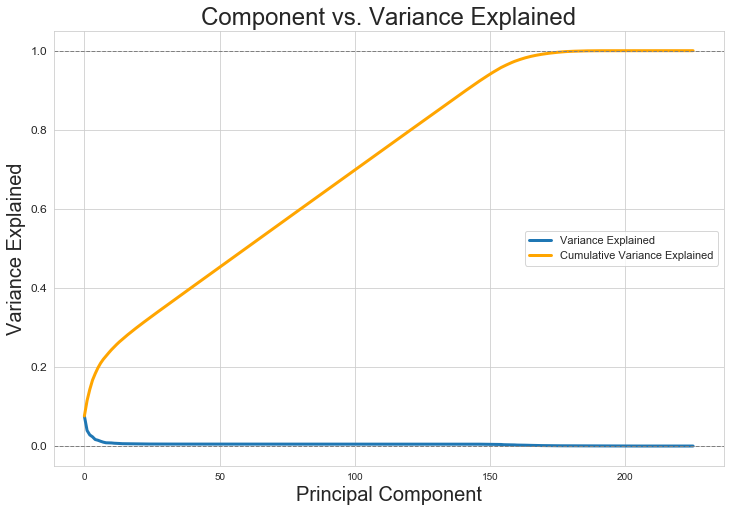

In [24]:
# Plot the variance explained (and cumulative variance explained).
# Set figure size.
plt.figure(figsize=(12,8))
# Plot the explained variance.
plt.plot(range(len(var_exp)), var_exp, lw=3, label = 'Variance Explained')
# Plot the cumulative explained variance.
plt.plot(range(len(var_exp)), cum_var_exp, lw=3, color = 'orange', label = 'Cumulative Variance Explained')
# Add horizontal lines at y=0 and y=1.
plt.axhline(y=0, linewidth=1, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=1, color='grey', ls='dashed')
# Set the limits of the axes.
#plt.xlim([-1,21])
#plt.ylim([-0.01,1.01])
# Label the axes.
plt.ylabel('Variance Explained', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)
# Make the tick labels bigger
#plt.xticks(range(0, 21, 5), range(1, 22, 5), fontsize=12)
plt.yticks(fontsize=12)
# Add title and legend.
plt.title('Component vs. Variance Explained', fontsize=24)
plt.legend(fontsize=11);

As per PCA, we will need to use around 120 features (the commulative variance explained > 80%)

In [25]:
top_features = [feature[1] for feature in pca_feature][:125]
print(len(top_features))
top_features

# top_features = set([feature[1] for feature in pca_feature][:165])
# #To avoid duplicate names of features due to truncation of names
# print(len(top_features))
# top_features

125


['WetBulb_1dayb',
 'Sign',
 'WetBulbDepression',
 'WetBulb_3dayb',
 'Sunrise',
 'LongLat',
 'PrecipTotal_5dayb',
 'DewPoint_2dayb',
 'PrecipTotal_1dayb',
 'PrecipTotal_4dayb',
 'ResultSpeed',
 'Species_CULEX PIPIENS/RESTUANS',
 'PrecipTotal_6dayb',
 'PrecipTotal_2dayb',
 'PrecipTotal_7dayb',
 'Species_CULEX TERRITANS',
 'Species_CULEX TERRITANS',
 'Species_CULEX SALINARIUS',
 'Species_CULEX SALINARIUS',
 'Species_CULEX TARSALIS',
 'Trap_T900',
 'Trap_T900',
 'Trap_T900',
 'Trap_T221',
 'Trap_T221',
 'Trap_T115',
 'Trap_T008',
 'Trap_T128',
 'Trap_T903',
 'Trap_T233',
 'Trap_T054',
 'Trap_T114',
 'Trap_T221',
 'Trap_T128',
 'Trap_T002',
 'Trap_T135',
 'Trap_T011',
 'Trap_T151',
 'Trap_T054',
 'Trap_T028',
 'Trap_T031',
 'Trap_T066',
 'Trap_T030',
 'Trap_T028',
 'Trap_T048',
 'Trap_T048',
 'Trap_T212',
 'Trap_T065',
 'Trap_T094',
 'Trap_T094',
 'Trap_T074',
 'Trap_T074',
 'Trap_T073',
 'Trap_T030',
 'Trap_T003',
 'Trap_T094',
 'Trap_T086',
 'Trap_T046',
 'Trap_T012',
 'Trap_T220',
 'Trap

 PCA visualization does not alter shape of datasets used. Recheck the shape of datasets before feature reduction. 

In [26]:
print('Shapes after SS and PCA transformation on training data (Train/Test split)')
print("Shapes of original X_train, X_test        : ", X_train.shape, X_test.shape)
print("Shapes of pca transformed X_train, X_test : ", X_tr_pca.shape, X_te_pca.shape)

Shapes after SS and PCA transformation on training data (Train/Test split)
Shapes of original X_train, X_test        :  (14932, 226) (4978, 226)
Shapes of pca transformed X_train, X_test :  (14932, 226) (4978, 226)


In [27]:
#Save original X_train, X_test, test with all features prior to dimenstionality reduction
X_train_all_feat, X_test_all_feat = X_train, X_test

#X and test is not saved as original dataframes are already available to recreate them as required

print("Shapes of preserved features datasets X_train, X_test are : ", X_train_all_feat.shape,X_test_all_feat.shape)

Shapes of preserved features datasets X_train, X_test are :  (14932, 226) (4978, 226)


In [28]:
pca = PCA(n_components = 125) # PCA with 125 components

#Limit the dimension of the training and test features
X_train = pca.fit_transform(X_tr_ss) # PCA fit and transform Train portion of Test Train splited training
X_test  = pca.transform(X_te_ss)     # PCA transform Test portion of Test Train splited training

In [29]:
#limit the dimensionality of test dataset (unseen test dataset) and all train set (X)
X = pca.fit_transform(ss.fit_transform(X))
test = pca.transform(ss.transform(test))

In [30]:
print('Shapes after SS and PCA transformation on training data (Train/Test split) and test to remain unseen')
print("Shapes of original X_train, X_test are                   : ", X_train_all_feat.shape, X_test_all_feat.shape)
print("Shapes of pca transformed X_train, X_test, test are      : ", X_train.shape, X_test.shape)
print("Shapes of pca transformed test/train observations(X) are : ", test.shape, X.shape)

Shapes after SS and PCA transformation on training data (Train/Test split) and test to remain unseen
Shapes of original X_train, X_test are                   :  (14932, 226) (4978, 226)
Shapes of pca transformed X_train, X_test, test are      :  (14932, 125) (4978, 125)
Shapes of pca transformed test/train observations(X) are :  (116293, 125) (19910, 125)


We will use the dimensions reduced observations for modelling

# 4. Model Selection

#### Common Reusable Functions for Modelling

In [110]:
def plot_confusion_matrix(model_name, cm, y_test, y_pred, size_small = True):

    print("\nConfusion Matrix for model : ", model_name, "\n", cm)
    
    #Plotting the confusion matrix
    #fig, ax = plt.subplots(figsize=(4, 4))
    
    if size_small == True:
        #plt.figure(figsize = (4,4))
        fig, ax = plt.subplots(figsize=(4, 4))
    else :
        #plt.figure(figsize = (12,8))
        fig, ax = plt.subplots(figsize=(12, 8))
        sns.set(font_scale=2)
        
    tick_marks = np.arange(len(y_test))
    plt.xticks(tick_marks, y_test)
    plt.yticks(tick_marks, y_pred)
    #sns.heatmap(pd.DataFrame(cm), annot=True, cmap="coolwarm", fmt='g', linewidths=2.5, linecolor='k')
    
    sns.set(font_scale=1.25)
    #f, ax = plt.subplots(figsize=(12, 9))
    c_m = sns.heatmap(pd.DataFrame(cm), cbar=True, annot=True, square=True, fmt='.2f', 
                      annot_kws={'size': 10}, linewidth = 2.5,
                      cmap = 'coolwarm', linecolor = 'white')

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plottitle= "Confusion matrix for " + model_name
    plt.title(plottitle, fontsize = 11)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    
    return

In [32]:
def sensitivity(tn, fp, fn, tp):
    sens = tp/(tp+fn)
    print(f'sensitivity = {sens}')
    
def specificity(tn, fp, fn, tp):
    spec = tn/(tn+fp)
    print(f'specificity = {spec}')
    
def precision(tn, fp, fn, tp):
    prec = tp/(tp+fp)
    print(f'precision = {prec}')
    
def accuracy(tn, fp, fn, tp):
    acc = (tp+tn)/(tn+fp+fn+tp)
    print(f'accuracy = {acc}')

def misclass_rate(tn, fp, fn, tp):
    misclass = (fp+fn)/(tn+fp+fn+tp)
    print(f'misclassification rate = {misclass}')

In [33]:
def print_summary (model_name, model, X_test, y_test, y_pred):
    
    print("\nSummary statistics after fitting/predicting the model : ", model_name)
    print("\nModel Test score:\t", model.score(X_test, y_test))
        
    # Generate confusion matrix.
    cm =  confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(model_name, cm, y_test, y_pred)
    
    print(classification_report(y_test, y_pred))
    
    # Calculate model evaluation metrics
    tn, fp, fn, tp = cm.ravel()
    print(f'\n\t\t TrueNegatives : {tn}, FalsePositives : {fp},\n\t\t FalseNegatives = {fn}, TruePositives = {tp}')
    
    sensitivity(tn, fp, fn, tp)
    specificity(tn, fp, fn, tp)
    precision(tn, fp, fn, tp)
    accuracy(tn, fp, fn, tp)
    misclass_rate(tn, fp, fn, tp)
        
    df_pred = pd.DataFrame(y_test, index=None)
    df_pred.columns=['true_values']
    prob_model = "pred_probs" + "_" + model_name
    df_pred[prob_model] = [i[1] for i in model.predict_proba(X_test)]
    print(df_pred.head())

    return

In [111]:
def aucroc(probas, y_true, size_small=True, step=0.01):  #,metric='sensitivity',threshold=95
    
    if size_small == True:
        plt.figure(figsize = (6,6))
    else: 
        plt.figure(figsize = (12,8))
    
    obs = y_true.values

    sensitivity = []
    specificity = []

    for t in np.arange(0,1,step): #iterate through each step of classification threshold
        
        TP = 0
        FP = 0
        FN = 0
        TN = 0
        
        for i in range(len(y_true)): #iterate through each observation
            predictions = probas[:,1] > t #only predicted class probability

            ##classify each based on whether correctly predicted
            if predictions[i] == 1 and obs[i] == 1:
                TP += 1
            elif predictions[i] == 0 and obs[i] == 1:
                FN += 1
            elif predictions[i] == 1 and obs[i] == 0:
                FP += 1
            elif predictions[i] == 0 and obs[i] == 0:
                TN += 1
        
        #calculate each metric
        sens = TP / (TP + FN)
        spec = TN / (TN + FP)

        #append all metrics to list 
        sensitivity.append(sens)
        specificity.append(1 - spec)

    #graph sens vs spec curve
    plt.rcParams['font.size'] = 14
    plt.plot(specificity,sensitivity, color='orange', label='ROC Curve')
    plt.plot([0,1],[0,1], color='black', lw=2, linestyle='--', label = 'baeline')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    plt.title(f'ROC Curve with AUC = {round(roc_auc_score(y_true, probas[:,1]),3)}', fontsize=22)
    plt.ylabel('Sensitivity : (TPR)', fontsize=18)
    plt.xlabel('1 - Specificity : (FPR)', fontsize=18)
#     plt.title('Receiver Operating Characteristic')
#     plt.xlabel("False Positive Rate")
#     plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

In [35]:
def fit_predict(model_name, model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    
    model.fit(X_train, y_train) #fit the model
    
    #print("\nSummary statistics after fitting the model : ", model_name)
   
    #get predictions 
    preds = model.predict(X_test)
    score = model.score(X_test, y_test)
    #print("\nModel Test score:\t", score)
    
    print_summary(model_name, model, X_test, y_test, preds)
    
    probas = model.predict_proba(X_test)
    print("roc_auc_score : ", roc_auc_score(y_test,probas[:,1]))
    aucroc(probas, y_test)
    
    return preds, score

In [36]:
def get_prediction_summary(y_test, y_pred):
    
    print(classification_report(y_test, y_pred))
          
    # Generate confusion matrix.
    cm =  confusion_matrix(y_test, y_pred)
    
    # Calculate model evaluation metrics
    tn, fp, fn, tp = cm.ravel()
    
    print(f'\n\t\t TrueNegatives : {tn}, FalsePositives : {fp},\n\t\t FalseNegatives = {fn}, TruePositives = {tp}')
          
    sensitivity(tn, fp, fn, tp)
    specificity(tn, fp, fn, tp)
    precision(tn, fp, fn, tp)
    accuracy(tn, fp, fn, tp)
    misclass_rate(tn, fp, fn, tp)
    return

For selected features, tune the Models (Logistic Regression, Decision Tree, Random Forest, Extra Trees Classifier, Gradient Boosting, Ada Boost, SVM) with varying parameters, to find the right parameters applicable to features 

In [37]:
def pipeline_gridsearch(model_abr, pipe, pipe_params, cv=5, 
                        X_train=X_train, y_train=y_train, X_test =X_test,  y_test =y_test):

    t1_start = perf_counter()   
    
    gs = GridSearchCV(pipe, param_grid=pipe_params, cv=cv, n_jobs = -1, scoring = 'roc_auc', verbose=1)
    gs.fit(X_train, y_train)
    print(gs.best_score_) # best_score_ is gridsearch's function
    print(gs.best_params_)# best_params_ is gridsearch's function
    
    y_pred = gs.best_estimator_.predict(X_test)
    get_prediction_summary(y_test, y_pred)
    
    df_pred = pd.DataFrame(y_test, index=None)
    df_pred.columns=['true_values']
    prob_model = "pred_probs" # + "_" + model_name
    df_pred[prob_model] = [i[1] for i in gs.best_estimator_.predict_proba(X_test)]
    print(df_pred.head())
    
    
    report = classification_report(y_test, y_pred, target_names=['Predict 0', 'Predict 1'], output_dict=True)    
    class_table = pd.DataFrame(report).transpose().drop(['macro avg','weighted avg'],axis=0)
    print(class_table)
    
    t1_stop = perf_counter()     
    print(f'\nElapsed time doing grid search for model {model_abr} is {(t1_stop-t1_start)} seconds')
    return class_table

### Model  Tuning : ExtraTreesClassifier

In [39]:
# {'et__max_depth': 40, 'et__min_samples_leaf': 4, 'et__n_estimators': 115}
# {'et__max_depth': 45, 'et__min_samples_leaf': 3, 'et__n_estimators': 115}

In [76]:
pipe_et = Pipeline([
                    ('ss', StandardScaler()),
                    ('et', ExtraTreesClassifier())
                  ])
pipe_params_et = {
                    'et__n_estimators'     : [112, 114, 115, 116, 118],
                    'et__max_depth'        : [35, 37, 40, 42, 45],
                    'et__min_samples_leaf' : [ 2, 3,   4,  5, 6]
                 }
pipeline_gridsearch("et", pipe_et, pipe_params_et)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed: 13.8min finished


0.9836389478137422
{'et__max_depth': 45, 'et__min_samples_leaf': 3, 'et__n_estimators': 115}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2489
           1       0.97      0.95      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2424, FalsePositives : 65,
		 FalseNegatives = 136, TruePositives = 2353
sensitivity = 0.9453595821615106
specificity = 0.9738850944154279
precision = 0.9731182795698925
accuracy = 0.9596223382884692
misclassification rate = 0.04037766171153073
       true_values  pred_probs
8314             0    0.061498
4522             0    0.064969
13383            1    0.982508
10520            1    1.000000
19862            1    1.000000
           precision    recall  f1-score      support
Predict 0   0.946875  0.973885  0.960190  2489.000000
Predict 1   0.973118 

,precision,recall,f1-score,support
Predict 0,0.946875,0.973885,0.960190,2489.000000
Predict 1,0.973118,0.945360,0.959038,2489.000000
accuracy,0.959622,0.959622,0.959622,0.959622


In [40]:
# {'et__max_depth': 40, 'et__min_samples_leaf': 3, 'et__n_estimators': 120}

In [72]:
pipe_et = Pipeline([
                    ('ss', StandardScaler()),
                    ('et', ExtraTreesClassifier())
                  ])
pipe_params_et = {
                    'et__n_estimators'     : [115, 120, 125],
                    'et__max_depth'        : [40, 50, 60],
                    'et__min_samples_leaf' : [ 2,   3,  4]
                 }
pipeline_gridsearch("et", pipe_et, pipe_params_et)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  3.3min finished


0.9835992897357025
{'et__max_depth': 40, 'et__min_samples_leaf': 4, 'et__n_estimators': 115}
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2489
           1       0.98      0.94      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2434, FalsePositives : 55,
		 FalseNegatives = 142, TruePositives = 2347
sensitivity = 0.9429489754921655
specificity = 0.9779027721976697
precision = 0.9771024146544546
accuracy = 0.9604258738449176
misclassification rate = 0.039574126155082365
       true_values  pred_probs
8314             0    0.034541
4522             0    0.037466
13383            1    0.975272
10520            1    1.000000
19862            1    0.999275
           precision    recall  f1-score      support
Predict 0   0.944876  0.977903  0.961106  2489.000000
Predict 1   0.977102

,precision,recall,f1-score,support
Predict 0,0.944876,0.977903,0.961106,2489.000000
Predict 1,0.977102,0.942949,0.959722,2489.000000
accuracy,0.960426,0.960426,0.960426,0.960426


In [71]:
pipe_et = Pipeline([
                    ('ss', StandardScaler()),
                    ('et', ExtraTreesClassifier())
                  ])
pipe_params_et = {
                    'et__n_estimators'     : [115, 120, 125],
                    'et__max_depth'        : [30, 35, 40],
                    'et__min_samples_leaf' : [ 2,   3,  4]
                 }
pipeline_gridsearch("et", pipe_et, pipe_params_et)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  3.3min finished


0.983795131143275
{'et__max_depth': 40, 'et__min_samples_leaf': 3, 'et__n_estimators': 120}
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2489
           1       0.98      0.95      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2432, FalsePositives : 57,
		 FalseNegatives = 136, TruePositives = 2353
sensitivity = 0.9453595821615106
specificity = 0.9770992366412213
precision = 0.9763485477178423
accuracy = 0.961229409401366
misclassification rate = 0.03877059059863399
       true_values  pred_probs
8314             0    0.034699
4522             0    0.053565
13383            1    0.991667
10520            1    1.000000
19862            1    1.000000
           precision    recall  f1-score      support
Predict 0   0.947040  0.977099  0.961835  2489.000000
Predict 1   0.976349  0

,precision,recall,f1-score,support
Predict 0,0.947040,0.977099,0.961835,2489.000000
Predict 1,0.976349,0.945360,0.960604,2489.000000
accuracy,0.961229,0.961229,0.961229,0.961229


In [ ]:
#{'et__max_depth': 30, 'et__min_samples_leaf': 3, 'et__n_estimators': 120}

In [69]:
pipe_et = Pipeline([
                    ('ss', StandardScaler()),
                    ('et', ExtraTreesClassifier())
                  ])
pipe_params_et = {
                    'et__n_estimators'     : [100, 110, 120, 130, 140],
                    'et__max_depth'        : [10,  15,  20,  25,  30],
                    'et__min_samples_leaf' : [1,    2,   3,  4,   5]
                 }
pipeline_gridsearch("et", pipe_et, pipe_params_et)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed: 13.5min finished


0.9835924351607691
{'et__max_depth': 30, 'et__min_samples_leaf': 3, 'et__n_estimators': 120}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2489
           1       0.97      0.95      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2426, FalsePositives : 63,
		 FalseNegatives = 131, TruePositives = 2358
sensitivity = 0.9473684210526315
specificity = 0.9746886299718762
precision = 0.9739776951672863
accuracy = 0.9610285255122539
misclassification rate = 0.038971474487746086
       true_values  pred_probs
8314             0    0.024537
4522             0    0.044190
13383            1    0.978500
10520            1    1.000000
19862            1    0.991667
           precision    recall  f1-score      support
Predict 0   0.948768  0.974689  0.961554  2489.000000
Predict 1   0.973978

,precision,recall,f1-score,support
Predict 0,0.948768,0.974689,0.961554,2489.000000
Predict 1,0.973978,0.947368,0.960489,2489.000000
accuracy,0.961029,0.961029,0.961029,0.961029


In [ ]:
#{'et__max_depth': 20, 'et__min_samples_leaf': 1, 'et__n_estimators': 120}

In [41]:
pipe_et = Pipeline([
                    ('ss', StandardScaler()),
                    ('et', ExtraTreesClassifier())
                  ])
pipe_params_et = {
                    'et__n_estimators'     : [100, 120, 135, 145, 155],
                    'et__max_depth'        : [10,   20, 30,  40,  50],
                    'et__min_samples_leaf' : [1,    2,   3,  4,   5]
                 }
pipeline_gridsearch("et", pipe_et, pipe_params_et)

0.9155518297529974
{'et__max_depth': 20, 'et__min_samples_leaf': 1, 'et__n_estimators': 120}

Elapsed time to pipeline_gridsearch - et is 3944.0121301 seconds


### Model  Tuning : RandomForestClassifier

In [105]:
pipe_rf = Pipeline([
                    ('ss', StandardScaler()),
                    ('rf', RandomForestClassifier())
                  ])
pipe_params_rf = {
                    'rf__n_estimators'     : [120, 140, 160],
                    'rf__max_features'     : [10,  20,   30],
                    'rf__max_depth'        : [10,  20,   30 ],
                    'rf__min_samples_leaf' : [ 2,  3,    4]
                 }
pipeline_gridsearch("rf", pipe_rf, pipe_params_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 38.1min finished


0.9845417030286805
{'rf__max_depth': 10, 'rf__max_features': 30, 'rf__min_samples_leaf': 2, 'rf__n_estimators': 160}
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2489
           1       0.98      0.92      0.95      2489

    accuracy                           0.95      4978
   macro avg       0.95      0.95      0.95      4978
weighted avg       0.95      0.95      0.95      4978


		 TrueNegatives : 2439, FalsePositives : 50,
		 FalseNegatives = 188, TruePositives = 2301
sensitivity = 0.924467657693853
specificity = 0.9799116110887907
precision = 0.9787324542747767
accuracy = 0.9521896343913219
misclassification rate = 0.047810365608678185
       true_values  pred_probs
8314             0    0.024528
4522             0    0.029537
13383            1    0.998703
10520            1    0.998703
19862            1    0.998703
           precision    recall  f1-score     support
Predict 0   0.928435  0.979912  0.953479  2489.00000

,precision,recall,f1-score,support
Predict 0,0.928435,0.979912,0.953479,2489.00000
Predict 1,0.978732,0.924468,0.950826,2489.00000
accuracy,0.952190,0.952190,0.952190,0.95219


In [118]:
pipe_rf = Pipeline([
                    ('ss', StandardScaler()),
                    ('rf', RandomForestClassifier())
                  ])
pipe_params_rf = {
                    'rf__n_estimators'     : [160, 180, 200],
                    'rf__max_features'     : [30,  40,  50],
                    'rf__max_depth'        : [10,  20,  30],
                    'rf__min_samples_leaf' : [1,   2,   3]
                 }
pipeline_gridsearch("rf", pipe_rf, pipe_params_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 46.3min finished


0.9847379112010994
{'rf__max_depth': 20, 'rf__max_features': 50, 'rf__min_samples_leaf': 3, 'rf__n_estimators': 160}
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2489
           1       0.98      0.94      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2430, FalsePositives : 59,
		 FalseNegatives = 160, TruePositives = 2329
sensitivity = 0.9357171554841301
specificity = 0.976295701084773
precision = 0.9752931323283082
accuracy = 0.9560064282844516
misclassification rate = 0.043993571715548414
       true_values  pred_probs
8314             0    0.013945
4522             0    0.027095
13383            1    1.000000
10520            1    1.000000
19862            1    1.000000
           precision    recall  f1-score      support
Predict 0   0.938224  0.976296  0.956881  2489.0000

,precision,recall,f1-score,support
Predict 0,0.938224,0.976296,0.956881,2489.000000
Predict 1,0.975293,0.935717,0.955095,2489.000000
accuracy,0.956006,0.956006,0.956006,0.956006


In [127]:
pipe_rf = Pipeline([
                    ('ss', StandardScaler()),
                    ('rf', RandomForestClassifier())
                  ])
pipe_params_rf = {
                    'rf__n_estimators'     : [160, 170],
                    'rf__max_features'     : [50,  75,  100],
                    'rf__max_depth'        : [15,  20,  25],
                    'rf__min_samples_leaf' : [2,   3,   4]
                 }
pipeline_gridsearch("rf", pipe_rf, pipe_params_rf)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 57.7min finished


0.9852329808945368
{'rf__max_depth': 15, 'rf__max_features': 100, 'rf__min_samples_leaf': 2, 'rf__n_estimators': 170}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2489
           1       0.97      0.95      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2425, FalsePositives : 64,
		 FalseNegatives = 132, TruePositives = 2357
sensitivity = 0.9469666532744074
specificity = 0.974286862193652
precision = 0.9735646427096242
accuracy = 0.9606267577340297
misclassification rate = 0.03937324226597027
       true_values  pred_probs
8314             0    0.013943
4522             0    0.016683
13383            1    0.999996
10520            1    0.999996
19862            1    0.999996
           precision    recall  f1-score      support
Predict 0   0.948377  0.974287  0.961157  2489.0000

,precision,recall,f1-score,support
Predict 0,0.948377,0.974287,0.961157,2489.000000
Predict 1,0.973565,0.946967,0.960081,2489.000000
accuracy,0.960627,0.960627,0.960627,0.960627


In [54]:
pipe_rf = Pipeline([
                    ('ss', StandardScaler()),
                    ('rf', RandomForestClassifier())
                  ])
pipe_params_rf = {
                    'rf__n_estimators'     : [170, 180],
                    'rf__max_features'     : [100,  110,  120, 130],
                    'rf__max_depth'        : [10, 15,  20, 30],
                    'rf__min_samples_leaf' : [2,   3,   4]
                 }
pipeline_gridsearch("rf", pipe_rf, pipe_params_rf)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 105.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 114.2min finished


0.9853601835253094
{'rf__max_depth': 15, 'rf__max_features': 110, 'rf__min_samples_leaf': 4, 'rf__n_estimators': 180}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2489
           1       0.97      0.94      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2424, FalsePositives : 65,
		 FalseNegatives = 138, TruePositives = 2351
sensitivity = 0.9445560466050623
specificity = 0.9738850944154279
precision = 0.9730960264900662
accuracy = 0.9592205705102451
misclassification rate = 0.04077942948975492
       true_values  pred_probs
8314             0    0.013819
4522             0    0.011709
13383            1    0.997222
10520            1    1.000000
19862            1    1.000000
           precision    recall  f1-score      support
Predict 0   0.946136  0.973885  0.959810  2489.000

,precision,recall,f1-score,support
Predict 0,0.946136,0.973885,0.959810,2489.000000
Predict 1,0.973096,0.944556,0.958614,2489.000000
accuracy,0.959221,0.959221,0.959221,0.959221


### Model Tuning : SVM

In [62]:
pipe_svm = Pipeline([
                    ('ss', StandardScaler()),
                    ('svm', SVC(gamma='scale', probability=True))
                  ])
pipe_params_svm = { 
                    'svm__C'      : [40, 50, 60, 70],
                    'svm__kernel' : ['rbf']
                }
pipeline_gridsearch("svm", pipe_svm, pipe_params_svm)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:  3.4min remaining:   22.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.4min finished


0.9828447959818533
{'svm__C': 40, 'svm__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2489
           1       0.95      0.95      0.95      2489

    accuracy                           0.95      4978
   macro avg       0.95      0.95      0.95      4978
weighted avg       0.95      0.95      0.95      4978


		 TrueNegatives : 2368, FalsePositives : 121,
		 FalseNegatives = 117, TruePositives = 2372
sensitivity = 0.9529931699477702
specificity = 0.9513860988348735
precision = 0.9514640994785399
accuracy = 0.9521896343913219
misclassification rate = 0.047810365608678185
       true_values  pred_probs
8314             0    0.037870
4522             0    0.142430
13383            1    0.999992
10520            1    0.996758
19862            1    1.000000
           precision    recall  f1-score     support
Predict 0   0.952918  0.951386  0.952151  2489.00000
Predict 1   0.951464  0.952993  0.952228  2489.00000
accur

,precision,recall,f1-score,support
Predict 0,0.952918,0.951386,0.952151,2489.00000
Predict 1,0.951464,0.952993,0.952228,2489.00000
accuracy,0.952190,0.952190,0.952190,0.95219


In [63]:
pipe_svm = Pipeline([
                    ('ss', StandardScaler()),
                    ('svm', SVC(gamma='scale', probability=True))
                  ])
pipe_params_svm = { 'svm__C'      : [60, 65, 70],
                    'svm__kernel' : ['rbf']
                }
pipeline_gridsearch("svm", pipe_svm, pipe_params_svm)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  2.1min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.6min finished


0.9827017146913581
{'svm__C': 60, 'svm__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2489
           1       0.95      0.95      0.95      2489

    accuracy                           0.95      4978
   macro avg       0.95      0.95      0.95      4978
weighted avg       0.95      0.95      0.95      4978


		 TrueNegatives : 2358, FalsePositives : 131,
		 FalseNegatives = 117, TruePositives = 2372
sensitivity = 0.9529931699477702
specificity = 0.9473684210526315
precision = 0.9476628046344386
accuracy = 0.9501807955002008
misclassification rate = 0.04981920449979912
       true_values  pred_probs
8314             0    0.038451
4522             0    0.139433
13383            1    0.999996
10520            1    0.999991
19862            1    1.000000
           precision    recall  f1-score      support
Predict 0   0.952727  0.947368  0.950040  2489.000000
Predict 1   0.947663  0.952993  0.950321  2489.000000
acc

,precision,recall,f1-score,support
Predict 0,0.952727,0.947368,0.950040,2489.000000
Predict 1,0.947663,0.952993,0.950321,2489.000000
accuracy,0.950181,0.950181,0.950181,0.950181


In [57]:
pipe_svm = Pipeline([
                    ('ss', StandardScaler()),
                    ('svm', SVC(gamma='scale', probability=True))
                  ])
pipe_params_svm = { 
                    'svm__C'      : np.logspace(-3,2,2),
                    'svm__kernel' : ['rbf', 'sigmoid']
                }
pipeline_gridsearch("svm", pipe_svm, pipe_params_svm)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed: 14.7min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 14.8min finished


0.9822075026643317
{'svm__C': 100.0, 'svm__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2489
           1       0.94      0.95      0.95      2489

    accuracy                           0.95      4978
   macro avg       0.95      0.95      0.95      4978
weighted avg       0.95      0.95      0.95      4978


		 TrueNegatives : 2350, FalsePositives : 139,
		 FalseNegatives = 121, TruePositives = 2368
sensitivity = 0.9513860988348735
specificity = 0.9441542788268381
precision = 0.9445552453131233
accuracy = 0.9477701888308557
misclassification rate = 0.052229811169144234
       true_values  pred_probs
8314             0    0.039274
4522             0    0.148281
13383            1    0.999996
10520            1    0.999998
19862            1    1.000000
           precision    recall  f1-score     support
Predict 0   0.951032  0.944154  0.947581  2489.00000
Predict 1   0.944555  0.951386  0.947958  2489.00000
ac

,precision,recall,f1-score,support
Predict 0,0.951032,0.944154,0.947581,2489.00000
Predict 1,0.944555,0.951386,0.947958,2489.00000
accuracy,0.947770,0.947770,0.947770,0.94777


### Model  Tuning : DecisionTreeClassifier

In [47]:
pipe_dt = Pipeline([
                    ('ss', StandardScaler()),
                    ('dt', DecisionTreeClassifier())
                   ])   
pipe_params_dt = {
                    'dt__max_depth'         : [45, 50, 55, 60, 65, 70],
                    'dt__min_samples_split' : [10, 11, 12, 13, 14, 15],
                    'dt__min_samples_leaf'  : [5,  6,  7,  8,  9,  10]
                  }
pipeline_gridsearch("dt", pipe_dt, pipe_params_dt)
#{'dt__max_depth': 50, 'dt__min_samples_leaf': 6, 'dt__min_samples_split': 11}

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.8min finished


0.9746971157916973
{'dt__max_depth': 55, 'dt__min_samples_leaf': 10, 'dt__min_samples_split': 13}
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2489
           1       0.95      0.90      0.92      2489

    accuracy                           0.93      4978
   macro avg       0.93      0.93      0.93      4978
weighted avg       0.93      0.93      0.93      4978


		 TrueNegatives : 2370, FalsePositives : 119,
		 FalseNegatives = 252, TruePositives = 2237
sensitivity = 0.898754519887505
specificity = 0.9521896343913219
precision = 0.9494906621392191
accuracy = 0.9254720771394134
misclassification rate = 0.07452792286058658
       true_values  pred_probs
8314             0         0.0
4522             0         0.0
13383            1         1.0
10520            1         1.0
19862            1         1.0
           precision    recall  f1-score      support
Predict 0   0.903890  0.952190  0.927411  2489.000000
Predict 1   0.94

,precision,recall,f1-score,support
Predict 0,0.903890,0.952190,0.927411,2489.000000
Predict 1,0.949491,0.898755,0.923426,2489.000000
accuracy,0.925472,0.925472,0.925472,0.925472


In [46]:
pipe_dt = Pipeline([
                    ('ss', StandardScaler()),
                    ('dt', DecisionTreeClassifier())
                   ])   
pipe_params_dt = {
                    'dt__max_depth'         : [20, 30, 40, 50, 60, 70],
                    'dt__min_samples_split' : [1,  3,  5,  7,  9,  11],
                    'dt__min_samples_leaf'  : [1,  2,  3,  4,  5,  6]
                  }
pipeline_gridsearch("dt", pipe_dt, pipe_params_dt)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.5min finished


0.9729438580017487
{'dt__max_depth': 50, 'dt__min_samples_leaf': 6, 'dt__min_samples_split': 11}
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2489
           1       0.95      0.89      0.92      2489

    accuracy                           0.92      4978
   macro avg       0.92      0.92      0.92      4978
weighted avg       0.92      0.92      0.92      4978


		 TrueNegatives : 2363, FalsePositives : 126,
		 FalseNegatives = 272, TruePositives = 2217
sensitivity = 0.8907191643230213
specificity = 0.9493772599437525
precision = 0.9462227912932138
accuracy = 0.920048212133387
misclassification rate = 0.0799517878666131
       true_values  pred_probs
8314             0         0.0
4522             0         0.0
13383            1         1.0
10520            1         1.0
19862            1         1.0
           precision    recall  f1-score      support
Predict 0   0.896774  0.949377  0.922326  2489.000000
Predict 1   0.9462

,precision,recall,f1-score,support
Predict 0,0.896774,0.949377,0.922326,2489.000000
Predict 1,0.946223,0.890719,0.917632,2489.000000
accuracy,0.920048,0.920048,0.920048,0.920048


In [42]:
pipe_dt = Pipeline([
                    ('ss', StandardScaler()),
                    ('dt', DecisionTreeClassifier())
                   ]) 

pipe_params_dt = {
                    'dt__max_depth'         : [10, 30, 50],
                    'dt__min_samples_split' : [3,  7,  11],
                    'dt__min_samples_leaf'  : [1,  3,  5]
                }  

In [44]:
pipeline_gridsearch("dt", pipe_dt, pipe_params_dt)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   33.1s finished


0.9724450732452672
{'dt__max_depth': 30, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 3}
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2489
           1       0.95      0.91      0.93      2489

    accuracy                           0.93      4978
   macro avg       0.93      0.93      0.93      4978
weighted avg       0.93      0.93      0.93      4978


		 TrueNegatives : 2379, FalsePositives : 110,
		 FalseNegatives = 222, TruePositives = 2267
sensitivity = 0.9108075532342306
specificity = 0.9558055443953395
precision = 0.9537231804795961
accuracy = 0.933306548814785
misclassification rate = 0.06669345118521494
       true_values  pred_probs
8314             0         0.0
4522             0         0.0
13383            1         1.0
10520            1         1.0
19862            1         1.0
           precision    recall  f1-score      support
Predict 0   0.914648  0.955806  0.934774  2489.000000
Predict 1   0.9537

,precision,recall,f1-score,support
Predict 0,0.914648,0.955806,0.934774,2489.000000
Predict 1,0.953723,0.910808,0.931771,2489.000000
accuracy,0.933307,0.933307,0.933307,0.933307


In [ ]:
# dt__max_depth': 30, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 3}
#               precision    recall  f1-score   support

In [45]:
pipe_params_dt = {
                    'dt__max_depth'         : [25, 30, 35, 40, 45],
                    'dt__min_samples_split' : [1,  2,  3,  4,  5],
                    'dt__min_samples_leaf'  : [3,  4,  5,  6,  7]
                } 
pipeline_gridsearch("dt", pipe_dt, pipe_params_dt)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:  2.0min finished


0.9731184161179576
{'dt__max_depth': 35, 'dt__min_samples_leaf': 6, 'dt__min_samples_split': 4}
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2489
           1       0.95      0.90      0.92      2489

    accuracy                           0.92      4978
   macro avg       0.93      0.92      0.92      4978
weighted avg       0.93      0.92      0.92      4978


		 TrueNegatives : 2370, FalsePositives : 119,
		 FalseNegatives = 260, TruePositives = 2229
sensitivity = 0.8955403776617116
specificity = 0.9521896343913219
precision = 0.9493185689948893
accuracy = 0.9238650060265167
misclassification rate = 0.07613499397348332
       true_values  pred_probs
8314             0         0.0
4522             0         0.0
13383            1         1.0
10520            1         1.0
19862            1         1.0
           precision    recall  f1-score      support
Predict 0   0.901141  0.952190  0.925962  2489.000000
Predict 1   0.949

,precision,recall,f1-score,support
Predict 0,0.901141,0.952190,0.925962,2489.000000
Predict 1,0.949319,0.895540,0.921646,2489.000000
accuracy,0.923865,0.923865,0.923865,0.923865


### Model  Tuning : GradientBoostClassifier

In [80]:
pipe_gbc = Pipeline([
                    ('ss', StandardScaler()),
                    ('gbc', GradientBoostingClassifier())
                ])
pipe_params_gbc = {
                    'gbc__n_estimators'  : [115, 120, 125],
                    'gbc__max_depth'     : [6,  7,  8],
                    'gbc__learning_rate' : [0.1, 0.2, 0.3]
                  }
pipeline_gridsearch("gbc", pipe_gbc, pipe_params_gbc)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 29.8min finished


0.9870972024068159
{'gbc__learning_rate': 0.1, 'gbc__max_depth': 6, 'gbc__n_estimators': 120}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2489
           1       0.97      0.95      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2404, FalsePositives : 85,
		 FalseNegatives = 118, TruePositives = 2371
sensitivity = 0.952591402169546
specificity = 0.9658497388509442
precision = 0.9653908794788274
accuracy = 0.9592205705102451
misclassification rate = 0.04077942948975492
       true_values  pred_probs
8314             0    0.007090
4522             0    0.008530
13383            1    0.996639
10520            1    0.997015
19862            1    0.997121
           precision    recall  f1-score      support
Predict 0   0.953212  0.965850  0.959489  2489.000000
Predict 1   0.965391 

,precision,recall,f1-score,support
Predict 0,0.953212,0.965850,0.959489,2489.000000
Predict 1,0.965391,0.952591,0.958948,2489.000000
accuracy,0.959221,0.959221,0.959221,0.959221


In [88]:
pipe_gbc = Pipeline([
                    ('ss', StandardScaler()),
                    ('gbc', GradientBoostingClassifier())
                ])
pipe_params_gbc = {
                    'gbc__n_estimators'  : [115, 120, 125],
                    'gbc__max_depth'     : [6,  7,  8],
                    'gbc__learning_rate' : [0.05, 0.1, 0.15, 0.2]
                  }
pipeline_gridsearch("gbc", pipe_gbc, pipe_params_gbc)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 39.5min finished


0.9871547209479455
{'gbc__learning_rate': 0.1, 'gbc__max_depth': 6, 'gbc__n_estimators': 125}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2489
           1       0.97      0.95      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2409, FalsePositives : 80,
		 FalseNegatives = 136, TruePositives = 2353
sensitivity = 0.9453595821615106
specificity = 0.9678585777420651
precision = 0.9671187833949856
accuracy = 0.9566090799517879
misclassification rate = 0.043390920048212135
       true_values  pred_probs
8314             0    0.015450
4522             0    0.004949
13383            1    0.996537
10520            1    0.997090
19862            1    0.997184
           precision    recall  f1-score      support
Predict 0   0.946562  0.967859  0.957092  2489.000000
Predict 1   0.96711

,precision,recall,f1-score,support
Predict 0,0.946562,0.967859,0.957092,2489.000000
Predict 1,0.967119,0.945360,0.956115,2489.000000
accuracy,0.956609,0.956609,0.956609,0.956609


In [ ]:
'gbc__learning_rate': 0.2, 'gbc__max_depth': 7, 'gbc__n_estimators': 120}

In [79]:
pipe_gbc = Pipeline([
                    ('ss', StandardScaler()),
                    ('gbc', GradientBoostingClassifier())
                ])
pipe_params_gbc = {
                    'gbc__n_estimators'  : [120],
                    'gbc__max_depth'     : [5,  7,  8],
                    'gbc__learning_rate' : [0.05, 0.1, 0.2]
                  }
pipeline_gridsearch("gbc", pipe_gbc, pipe_params_gbc)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 10.0min finished


0.9870475145684121
{'gbc__learning_rate': 0.1, 'gbc__max_depth': 7, 'gbc__n_estimators': 120}
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2489
           1       0.97      0.94      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2415, FalsePositives : 74,
		 FalseNegatives = 143, TruePositives = 2346
sensitivity = 0.9425472077139413
specificity = 0.9702691844114102
precision = 0.9694214876033058
accuracy = 0.9564081960626758
misclassification rate = 0.043591803937324224
       true_values  pred_probs
8314             0    0.009310
4522             0    0.007592
13383            1    0.997299
10520            1    0.997852
19862            1    0.997844
           precision    recall  f1-score      support
Predict 0   0.944097  0.970269  0.957004  2489.000000
Predict 1   0.96942

,precision,recall,f1-score,support
Predict 0,0.944097,0.970269,0.957004,2489.000000
Predict 1,0.969421,0.942547,0.955795,2489.000000
accuracy,0.956408,0.956408,0.956408,0.956408


In [ ]:
#{'gbc__learning_rate': 0.3, 'gbc__max_depth': 8, 'gbc__n_estimators': 120}
#'gbc__learning_rate': 0.2, 'gbc__max_depth': 7, 'gbc__n_estimators': 120}

In [77]:
pipe_gbc = Pipeline([
                    ('ss', StandardScaler()),
                    ('gbc', GradientBoostingClassifier())
                ])
pipe_params_gbc = {
                    'gbc__n_estimators'  : [110, 115, 120],
                    'gbc__max_depth'     : [7,  8,  9],
                    'gbc__learning_rate' : [0.2, 0.25, 0.3]
                  }
pipeline_gridsearch("gbc", pipe_gbc, pipe_params_gbc)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 32.4min finished


0.9868119553866712
{'gbc__learning_rate': 0.2, 'gbc__max_depth': 7, 'gbc__n_estimators': 120}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2489
           1       0.97      0.94      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2424, FalsePositives : 65,
		 FalseNegatives = 140, TruePositives = 2349
sensitivity = 0.9437525110486139
specificity = 0.9738850944154279
precision = 0.9730737365368682
accuracy = 0.9588188027320209
misclassification rate = 0.04118119726797911
       true_values  pred_probs
8314             0    0.002567
4522             0    0.002643
13383            1    0.999057
10520            1    0.999303
19862            1    0.999290
           precision    recall  f1-score      support
Predict 0   0.945398  0.973885  0.959430  2489.000000
Predict 1   0.973074

,precision,recall,f1-score,support
Predict 0,0.945398,0.973885,0.959430,2489.000000
Predict 1,0.973074,0.943753,0.958189,2489.000000
accuracy,0.958819,0.958819,0.958819,0.958819


In [ ]:
#{'gbc__learning_rate': 0.5, 'gbc__max_depth': 10, 'gbc__n_estimators': 125}

In [73]:
pipe_gbc = Pipeline([
                    ('ss', StandardScaler()),
                    ('gbc', GradientBoostingClassifier())
                ])
pipe_params_gbc = {
                    'gbc__n_estimators'  : [120, 125, 130],
                    'gbc__max_depth'     : [6,  8,  10],
                    'gbc__learning_rate' : [0.3, 0.4, 0.5]
                  }
pipeline_gridsearch("gbc", pipe_gbc, pipe_params_gbc)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 37.2min finished


0.9858911200220856
{'gbc__learning_rate': 0.3, 'gbc__max_depth': 8, 'gbc__n_estimators': 120}
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2489
           1       0.97      0.94      0.95      2489

    accuracy                           0.95      4978
   macro avg       0.95      0.95      0.95      4978
weighted avg       0.95      0.95      0.95      4978


		 TrueNegatives : 2415, FalsePositives : 74,
		 FalseNegatives = 157, TruePositives = 2332
sensitivity = 0.9369224588188028
specificity = 0.9702691844114102
precision = 0.969243557772236
accuracy = 0.9535958216151065
misclassification rate = 0.04640417838489353
       true_values  pred_probs
8314             0    0.000306
4522             0    0.011012
13383            1    0.999688
10520            1    0.999820
19862            1    0.999833
           precision    recall  f1-score      support
Predict 0   0.938958  0.970269  0.954357  2489.000000
Predict 1   0.969244 

,precision,recall,f1-score,support
Predict 0,0.938958,0.970269,0.954357,2489.000000
Predict 1,0.969244,0.936922,0.952809,2489.000000
accuracy,0.953596,0.953596,0.953596,0.953596


In [68]:
pipe_gbc = Pipeline([
                    ('ss', StandardScaler()),
                    ('gbc', GradientBoostingClassifier())
                ])
pipe_params_gbc = {
                    'gbc__n_estimators'  : [100, 125, 150, 200],
                    'gbc__max_depth'     : [10,  20,  30,  40],
                    'gbc__learning_rate' : [0.5, 0.75, 1.0, 1.25]
                  }
pipeline_gridsearch("gbc", pipe_gbc, pipe_params_gbc)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 132.2min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 270.1min finished


0.9846777407765679
{'gbc__learning_rate': 0.5, 'gbc__max_depth': 10, 'gbc__n_estimators': 125}
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2489
           1       0.98      0.91      0.94      2489

    accuracy                           0.94      4978
   macro avg       0.94      0.94      0.94      4978
weighted avg       0.94      0.94      0.94      4978


		 TrueNegatives : 2435, FalsePositives : 54,
		 FalseNegatives = 235, TruePositives = 2254
sensitivity = 0.9055845721173162
specificity = 0.978304539975894
precision = 0.9766031195840554
accuracy = 0.9419445560466051
misclassification rate = 0.05805544395339494
       true_values  pred_probs
8314             0    0.000063
4522             0    0.000145
13383            1    0.999953
10520            1    0.999955
19862            1    0.999950
           precision    recall  f1-score      support
Predict 0   0.911985  0.978305  0.943981  2489.000000
Predict 1   0.976603

,precision,recall,f1-score,support
Predict 0,0.911985,0.978305,0.943981,2489.000000
Predict 1,0.976603,0.905585,0.939754,2489.000000
accuracy,0.941945,0.941945,0.941945,0.941945


### Model  Tuning : LogisticsRegression

In [85]:
pipe_lr = Pipeline([
                    ('ss', StandardScaler()),
                    ('lr', LogisticRegression())
                  ])
pipe_params_lr = {  
                    'lr__solver'       : ['liblinear'],
                    'lr__C'            : [1, 2, 3, 4, 5],  
                    'lr__class_weight' : ['balanced'],
                    'lr__penalty'      : ['l0', '11', 'l2', '13'],
                    'lr__fit_intercept': [False]
                  }
pipeline_gridsearch("lr", pipe_lr, pipe_params_lr, 7)

Fitting 7 folds for each of 20 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    9.1s finished


0.8370337885170597
{'lr__C': 2, 'lr__class_weight': 'balanced', 'lr__fit_intercept': False, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      2489
           1       0.74      0.82      0.78      2489

    accuracy                           0.76      4978
   macro avg       0.77      0.76      0.76      4978
weighted avg       0.77      0.76      0.76      4978


		 TrueNegatives : 1753, FalsePositives : 736,
		 FalseNegatives = 447, TruePositives = 2042
sensitivity = 0.8204098031337886
specificity = 0.7042989152269988
precision = 0.7350611951043916
accuracy = 0.7623543591803937
misclassification rate = 0.23764564081960626
       true_values  pred_probs
8314             0    0.061329
4522             0    0.078041
13383            1    0.821971
10520            1    0.474423
19862            1    0.671020
           precision    recall  f1-score      support
Predict 0   0.796818  0.704

,precision,recall,f1-score,support
Predict 0,0.796818,0.704299,0.747707,2489.000000
Predict 1,0.735061,0.820410,0.775394,2489.000000
accuracy,0.762354,0.762354,0.762354,0.762354


In [84]:
pipe_lr = Pipeline([
                    ('ss', StandardScaler()),
                    ('lr', LogisticRegression())
                  ])
pipe_params_lr = {  
                    'lr__solver'       : ['liblinear'],
                    'lr__C'            : [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009],  
                    'lr__class_weight' : ['balanced'],
                    'lr__penalty'      : ['l0', '11', 'l2', '13'],
                    'lr__fit_intercept': [False]
                  }
pipeline_gridsearch("lr", pipe_lr, pipe_params_lr, 7)

Fitting 7 folds for each of 36 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:   13.0s finished


0.8372607353216688
{'lr__C': 0.005, 'lr__class_weight': 'balanced', 'lr__fit_intercept': False, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      2489
           1       0.74      0.82      0.78      2489

    accuracy                           0.76      4978
   macro avg       0.77      0.76      0.76      4978
weighted avg       0.77      0.76      0.76      4978


		 TrueNegatives : 1757, FalsePositives : 732,
		 FalseNegatives = 451, TruePositives = 2038
sensitivity = 0.8188027320208919
specificity = 0.7059059863398955
precision = 0.7357400722021661
accuracy = 0.7623543591803937
misclassification rate = 0.23764564081960626
       true_values  pred_probs
8314             0    0.088709
4522             0    0.115167
13383            1    0.785327
10520            1    0.466269
19862            1    0.654877
           precision    recall  f1-score      support
Predict 0   0.795743  0

,precision,recall,f1-score,support
Predict 0,0.795743,0.705906,0.748137,2489.000000
Predict 1,0.735740,0.818803,0.775052,2489.000000
accuracy,0.762354,0.762354,0.762354,0.762354


In [83]:
pipe_lr = Pipeline([
                    ('ss', StandardScaler()),
                    ('lr', LogisticRegression())
                  ])
pipe_params_lr = {  
                    'lr__solver'       : ['liblinear'],
                    'lr__C'            : [0.03, 0.05, 0.07, 0.09, 0.13, 0.17, 0.21, 0.25, 0.29, 0.33, 0.5, 1.0, 1.5, 1.7, 2.0], 
                    'lr__class_weight' : ['balanced'],
                    'lr__penalty'      : ['l0', '11', 'l2', '13'],
                    'lr__fit_intercept': [False, True]
                  }
pipeline_gridsearch("lr", pipe_lr, pipe_params_lr, 7)

Fitting 7 folds for each of 120 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:   54.5s finished


0.8371414101676843
{'lr__C': 0.03, 'lr__class_weight': 'balanced', 'lr__fit_intercept': False, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.80      0.71      0.75      2489
           1       0.74      0.82      0.78      2489

    accuracy                           0.76      4978
   macro avg       0.77      0.76      0.76      4978
weighted avg       0.77      0.76      0.76      4978


		 TrueNegatives : 1755, FalsePositives : 734,
		 FalseNegatives = 447, TruePositives = 2042
sensitivity = 0.8204098031337886
specificity = 0.7051024507834471
precision = 0.7355907780979827
accuracy = 0.7627561269586179
misclassification rate = 0.2372438730413821
       true_values  pred_probs
8314             0    0.066431
4522             0    0.085436
13383            1    0.814218
10520            1    0.472026
19862            1    0.667851
           precision    recall  f1-score      support
Predict 0   0.797003  0.7

,precision,recall,f1-score,support
Predict 0,0.797003,0.705102,0.748241,2489.000000
Predict 1,0.735591,0.820410,0.775689,2489.000000
accuracy,0.762756,0.762756,0.762756,0.762756


In [81]:
pipe_lr = Pipeline([
                    ('ss', StandardScaler()),
                    ('lr', LogisticRegression())
                  ])
pipe_params_lr = {  
                    'lr__solver'       : ['liblinear'],
                    'lr__C'            : [0.05, 0.06, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1], 
                    'lr__class_weight' : ['balanced'],
                    'lr__penalty'      : ['l0', '11', 'l2', '13']
                  }
pipeline_gridsearch("lr", pipe_lr, pipe_params_lr, 7)

Fitting 7 folds for each of 56 candidates, totalling 392 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 392 out of 392 | elapsed:   28.3s finished


0.836648820580679
{'lr__C': 0.05, 'lr__class_weight': 'balanced', 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      2489
           1       0.75      0.80      0.78      2489

    accuracy                           0.77      4978
   macro avg       0.77      0.77      0.77      4978
weighted avg       0.77      0.77      0.77      4978


		 TrueNegatives : 1818, FalsePositives : 671,
		 FalseNegatives = 487, TruePositives = 2002
sensitivity = 0.8043390920048212
specificity = 0.7304138208115709
precision = 0.7489711934156379
accuracy = 0.7673764564081961
misclassification rate = 0.23262354359180393
       true_values  pred_probs
8314             0    0.052541
4522             0    0.065762
13383            1    0.792637
10520            1    0.433380
19862            1    0.637837
           precision    recall  f1-score      support
Predict 0   0.788720  0.730414  0.758448  2489.000000

,precision,recall,f1-score,support
Predict 0,0.788720,0.730414,0.758448,2489.000000
Predict 1,0.748971,0.804339,0.775668,2489.000000
accuracy,0.767376,0.767376,0.767376,0.767376


In [48]:
pipe_lr = Pipeline([
                    ('ss', StandardScaler()),
                    ('lr', LogisticRegression())
                  ])
pipe_params_lr = {  
                    'lr__solver'       : ['liblinear'],
                    'lr__C'            : [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009], 
                    'lr__class_weight' : ['balanced'],
                    'lr__penalty'      : ['l0', '11', 'l2', '13']
                  }
pipeline_gridsearch("lr", pipe_lr, pipe_params_lr, 7)

Fitting 7 folds for each of 36 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:   17.5s finished


0.837129371600837
{'lr__C': 0.003, 'lr__class_weight': 'balanced', 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      2489
           1       0.75      0.81      0.77      2489

    accuracy                           0.77      4978
   macro avg       0.77      0.77      0.77      4978
weighted avg       0.77      0.77      0.77      4978


		 TrueNegatives : 1806, FalsePositives : 683,
		 FalseNegatives = 484, TruePositives = 2005
sensitivity = 0.8055443953394937
specificity = 0.7255926074728807
precision = 0.7459077380952381
accuracy = 0.7655685014061873
misclassification rate = 0.23443149859381276
       true_values  pred_probs
8314             0    0.095162
4522             0    0.122150
13383            1    0.753156
10520            1    0.443896
19862            1    0.629465
           precision    recall  f1-score      support
Predict 0   0.788646  0.725593  0.755807  2489.00000

,precision,recall,f1-score,support
Predict 0,0.788646,0.725593,0.755807,2489.000000
Predict 1,0.745908,0.805544,0.774580,2489.000000
accuracy,0.765569,0.765569,0.765569,0.765569


### Model Tuning - ADABoostClassifier

In [56]:
pipe_ada = Pipeline([
                    ('ss', StandardScaler()),
                    ('ada', AdaBoostClassifier())
                ])
pipe_params_ada = {
                    'ada__n_estimators'  : [380, 390, 400, 410, 420],
                    'ada__learning_rate' : [.75, 0.8, 0.85, 0.9, .95]
                  }
pipeline_gridsearch("ada", pipe_ada, pipe_params_ada)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 20.7min finished


0.9839684744372619
{'ada__learning_rate': 0.85, 'ada__n_estimators': 410}
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2489
           1       0.94      0.94      0.94      2489

    accuracy                           0.94      4978
   macro avg       0.94      0.94      0.94      4978
weighted avg       0.94      0.94      0.94      4978


		 TrueNegatives : 2349, FalsePositives : 140,
		 FalseNegatives = 143, TruePositives = 2346
sensitivity = 0.9425472077139413
specificity = 0.9437525110486139
precision = 0.9436846339501207
accuracy = 0.9431498593812776
misclassification rate = 0.05685014061872238
       true_values  pred_probs
8314             0    0.471835
4522             0    0.496059
13383            1    0.507691
10520            1    0.509876
19862            1    0.508831
           precision    recall  f1-score     support
Predict 0   0.942616  0.943753  0.943184  2489.00000
Predict 1   0.943685  0.942547  0.943116 

,precision,recall,f1-score,support
Predict 0,0.942616,0.943753,0.943184,2489.00000
Predict 1,0.943685,0.942547,0.943116,2489.00000
accuracy,0.943150,0.943150,0.943150,0.94315


In [115]:
pipe_ada = Pipeline([
                    ('ss', StandardScaler()),
                    ('ada', AdaBoostClassifier())
                ])
pipe_params_ada = {
                    'ada__n_estimators'  : [350, 370, 390 ],
                    'ada__learning_rate' : [0.8, 0.85, 0.9]
                  }
pipeline_gridsearch("ada", pipe_ada, pipe_params_ada)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.0min finished


0.9839277853398178
{'ada__learning_rate': 0.85, 'ada__n_estimators': 390}
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2489
           1       0.95      0.94      0.94      2489

    accuracy                           0.94      4978
   macro avg       0.94      0.94      0.94      4978
weighted avg       0.94      0.94      0.94      4978


		 TrueNegatives : 2356, FalsePositives : 133,
		 FalseNegatives = 156, TruePositives = 2333
sensitivity = 0.937324226597027
specificity = 0.9465648854961832
precision = 0.9460665044606651
accuracy = 0.9419445560466051
misclassification rate = 0.05805544395339494
       true_values  pred_probs
8314             0    0.470273
4522             0    0.495696
13383            1    0.508056
10520            1    0.510223
19862            1    0.509234
           precision    recall  f1-score      support
Predict 0   0.937898  0.946565  0.942212  2489.000000
Predict 1   0.946067  0.937324  0.941675

,precision,recall,f1-score,support
Predict 0,0.937898,0.946565,0.942212,2489.000000
Predict 1,0.946067,0.937324,0.941675,2489.000000
accuracy,0.941945,0.941945,0.941945,0.941945


In [86]:
pipe_ada = Pipeline([
                    ('ss', StandardScaler()),
                    ('ada', AdaBoostClassifier())
                ])
pipe_params_ada = {
                    'ada__n_estimators'  : [300, 320, 340, 350],
                    'ada__learning_rate' : [0.7, 0.75, 0.8, 0.85]
                  }
pipeline_gridsearch("ada", pipe_ada, pipe_params_ada)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 10.8min finished


0.9837068931485415
{'ada__learning_rate': 0.8, 'ada__n_estimators': 350}
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2489
           1       0.96      0.93      0.94      2489

    accuracy                           0.94      4978
   macro avg       0.94      0.94      0.94      4978
weighted avg       0.94      0.94      0.94      4978


		 TrueNegatives : 2387, FalsePositives : 102,
		 FalseNegatives = 177, TruePositives = 2312
sensitivity = 0.928887103254319
specificity = 0.959019686621133
precision = 0.9577464788732394
accuracy = 0.943953394937726
misclassification rate = 0.056046605062274005
       true_values  pred_probs
8314             0    0.464194
4522             0    0.494301
13383            1    0.510167
10520            1    0.510535
19862            1    0.510815
           precision    recall  f1-score      support
Predict 0   0.930967  0.959020  0.944785  2489.000000
Predict 1   0.957746  0.928887  0.943096  

,precision,recall,f1-score,support
Predict 0,0.930967,0.959020,0.944785,2489.000000
Predict 1,0.957746,0.928887,0.943096,2489.000000
accuracy,0.943953,0.943953,0.943953,0.943953


In [64]:
pipe_ada = Pipeline([
                    ('ss', StandardScaler()),
                    ('ada', AdaBoostClassifier())
                ])
pipe_params_ada = {
                    'ada__n_estimators'  : [300, 350, 400, 450],
                    'ada__learning_rate' : [0.6, 0.7, 0.8, 0.9]
                  }
pipeline_gridsearch("ada", pipe_ada, pipe_params_ada)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 21.1min finished


0.9837068931485415
{'ada__learning_rate': 0.8, 'ada__n_estimators': 350}
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2489
           1       0.96      0.93      0.94      2489

    accuracy                           0.94      4978
   macro avg       0.94      0.94      0.94      4978
weighted avg       0.94      0.94      0.94      4978


		 TrueNegatives : 2387, FalsePositives : 102,
		 FalseNegatives = 177, TruePositives = 2312
sensitivity = 0.928887103254319
specificity = 0.959019686621133
precision = 0.9577464788732394
accuracy = 0.943953394937726
misclassification rate = 0.056046605062274005
       true_values  pred_probs
8314             0    0.464194
4522             0    0.494301
13383            1    0.510167
10520            1    0.510535
19862            1    0.510815
           precision    recall  f1-score      support
Predict 0   0.930967  0.959020  0.944785  2489.000000
Predict 1   0.957746  0.928887  0.943096  

,precision,recall,f1-score,support
Predict 0,0.930967,0.959020,0.944785,2489.000000
Predict 1,0.957746,0.928887,0.943096,2489.000000
accuracy,0.943953,0.943953,0.943953,0.943953


In [62]:
pipe_ada = Pipeline([
                    ('ss', StandardScaler()),
                    ('ada', AdaBoostClassifier())
                ])
pipe_params_ada = {
                    'ada__n_estimators'  : [150, 200, 250, 300],
                    'ada__learning_rate' : [0.3, 0.4, 0.5, 0.6]
                  }
pipeline_gridsearch("ada", pipe_ada, pipe_params_ada)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 15.1min finished


0.9830765350617888
{'ada__learning_rate': 0.6, 'ada__n_estimators': 300}
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2489
           1       0.96      0.93      0.94      2489

    accuracy                           0.94      4978
   macro avg       0.94      0.94      0.94      4978
weighted avg       0.94      0.94      0.94      4978


		 TrueNegatives : 2390, FalsePositives : 99,
		 FalseNegatives = 181, TruePositives = 2308
sensitivity = 0.9272800321414223
specificity = 0.9602249899558055
precision = 0.9588699626090569
accuracy = 0.9437525110486139
misclassification rate = 0.0562474889513861
       true_values  pred_probs
8314             0    0.459506
4522             0    0.491708
13383            1    0.513320
10520            1    0.514073
19862            1    0.514585
           precision    recall  f1-score      support
Predict 0   0.929599  0.960225  0.944664  2489.000000
Predict 1   0.958870  0.927280  0.942810  

,precision,recall,f1-score,support
Predict 0,0.929599,0.960225,0.944664,2489.000000
Predict 1,0.958870,0.927280,0.942810,2489.000000
accuracy,0.943753,0.943753,0.943753,0.943753


## 5. Model Evaluation and Kaggle Submission

In [50]:
def fit_prepare_kaggle_file(model_abr, model_name, model, 
                            X=X, y=y, X_test=test, target=target, df=df_test):
    
    t1_start = perf_counter()  
    filename_proba = '../assets/submission/balanced_proba_' + model_abr + '.csv'
    filename_submission = '../assets/submission/balanced_submission_' + model_abr + '.csv'
    
    #Fit on entire training set (without split) to use for prediction on unseen test & Save prediction for Kaggle
    model.fit(X, y)
    score=round(model.score(X, y), 4)
    print("Training Score after fitting entire train set - ", model_abr, " : ", score)
    
    t1_stop = perf_counter()     
    print(f'\nElapsed time for fitting of model {model_abr} is {(t1_stop-t1_start)} seconds')
    
    t1_start = perf_counter() 
    y_preds = model.predict_proba(test)[:,1]
    print(y_preds.shape)   
    t1_stop = perf_counter()
    print(f'\nElapsed time to predict proba test dataset, model {model_abr} is {(t1_stop-t1_start)} seconds')
    
    t1_start = perf_counter() 
    y_pred = model.predict(test)
    print(y_pred.shape)   
    t1_stop = perf_counter()
    print(f'\nElapsed time to predict test dataset, model {model_abr} is {(t1_stop-t1_start)} seconds')
    
    output = pd.DataFrame(df_test['Id'])
    output[target] = y_pred
    output.set_index(['Id'], inplace = True)
    output.to_csv(filename_submission)

    output1 = pd.DataFrame(df_test['Id'])
    output1[target] = y_preds
    output1.set_index(['Id'], inplace = True)
    output1.to_csv(filename_proba)
    
    return score

Instantiate models to check predictions against Test Dataset

### 5.1  ExtraTrees Classifier

#### 5.1.1 Extra Tree Classifier Models Create, Validate

- From a dozen models used for tuning, 3 shortlisted models tuned were selected for further evaluation as shown below

In [107]:
#instantiate models to check predictions against Test Dataset
best_et   = ExtraTreesClassifier(random_state=42, max_depth=40, min_samples_leaf=3, n_estimators=120)
best_et1  = ExtraTreesClassifier(random_state=42, max_depth=30, min_samples_leaf=1, n_estimators=120)
best_et2  = ExtraTreesClassifier(random_state=42, max_depth=20, min_samples_leaf=1, n_estimators=120)


Summary statistics after fitting/predicting the model :  ExtraTree

Model Test score:	 0.9616311771795902

Confusion Matrix for model :  ExtraTree 
 [[2429   60]
 [ 131 2358]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2489
           1       0.98      0.95      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2429, FalsePositives : 60,
		 FalseNegatives = 131, TruePositives = 2358
sensitivity = 0.9473684210526315
specificity = 0.9758939333065488
precision = 0.9751861042183623
accuracy = 0.9616311771795902
misclassification rate = 0.038368822820409806
       true_values  pred_probs_ExtraTree
8314             0              0.025496
4522             0              0.063300
13383            1              0.990833
10520            1              1.000000
19862            1       

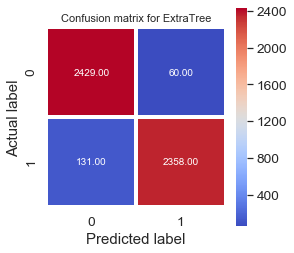

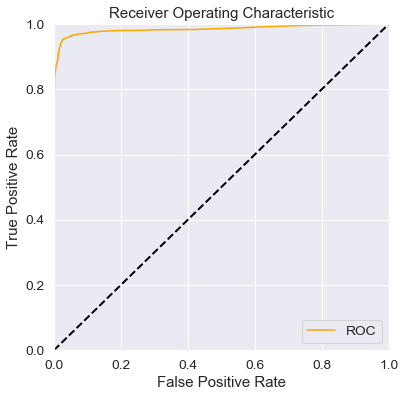

Training Score after fitting entire train set -  et  :  0.9694

Elapsed time for fitting of model et is 4.109540899997228 seconds
(116293,)

Elapsed time to predict proba test dataset, model et is 2.490089100014302 seconds
(116293,)

Elapsed time to predict test dataset, model et is 1.5673723999934737 seconds


In [99]:
#Fit and test the best ExtraTree Model
model_abr  = "et"
model_name = "ExtraTree"
model      = best_et
best_et_preds, best_et_score = fit_predict(model_name, model)
best_et_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)


Summary statistics after fitting/predicting the model :  ExtraTree

Model Test score:	 0.9596223382884692

Confusion Matrix for model :  ExtraTree 
 [[2419   70]
 [ 131 2358]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2489
           1       0.97      0.95      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2419, FalsePositives : 70,
		 FalseNegatives = 131, TruePositives = 2358
sensitivity = 0.9473684210526315
specificity = 0.9718762555243069
precision = 0.971169686985173
accuracy = 0.9596223382884692
misclassification rate = 0.04037766171153073
       true_values  pred_probs_ExtraTree
8314             0              0.058333
4522             0              0.116667
13383            1              0.970833
10520            1              1.000000
19862            1         

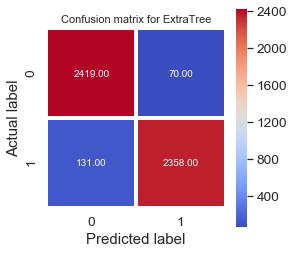

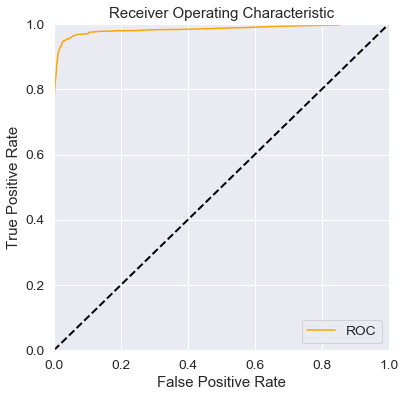

Training Score after fitting entire train set -  et1  :  0.9802

Elapsed time for fitting of model et1 is 3.643594499997562 seconds
(116293,)

Elapsed time to predict proba test dataset, model et1 is 1.7419481999968411 seconds
(116293,)

Elapsed time to predict test dataset, model et1 is 1.572643400009838 seconds


In [103]:
#Fit and test the best ExtraTree Model 1
model_abr  = "et1"
model_name = "ExtraTree"
model      = best_et1
best_et_preds, best_et_score = fit_predict(model_name, model)
best_et_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)


Summary statistics after fitting/predicting the model :  ExtraTree

Model Test score:	 0.9576134993973483

Confusion Matrix for model :  ExtraTree 
 [[2415   74]
 [ 137 2352]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2489
           1       0.97      0.94      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2415, FalsePositives : 74,
		 FalseNegatives = 137, TruePositives = 2352
sensitivity = 0.9449578143832864
specificity = 0.9702691844114102
precision = 0.9694971145919209
accuracy = 0.9576134993973483
misclassification rate = 0.042386500602651665
       true_values  pred_probs_ExtraTree
8314             0              0.034615
4522             0              0.100379
13383            1              0.991341
10520            1              0.999710
19862            1       

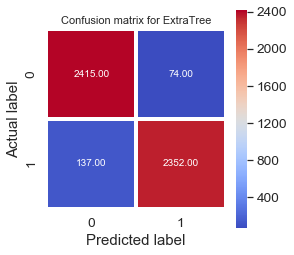

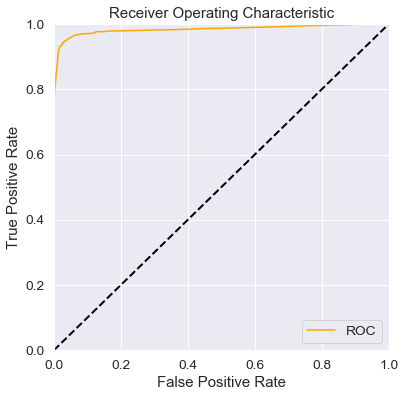

Training Score after fitting entire train set -  et2  :  0.9802

Elapsed time for fitting of model et2 is 3.554161899999599 seconds
(116293,)

Elapsed time to predict proba test dataset, model et2 is 1.8007518000085838 seconds
(116293,)

Elapsed time to predict test dataset, model et2 is 1.8881831000035163 seconds


In [104]:
#Fit and test the best ExtraTree Model2
model_abr  = "et2"
model_name = "ExtraTree"
model      = best_et2
best_et_preds, best_et_score = fit_predict(model_name, model)
best_et_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)

#### 5.1.2 Extra Tree Kaggle Score 
      
- From 3 shortlisted models, the one with parameters (max_depth=40, min_samples_leaf=3, n_estimators=120) was used for kaggle submission.
- Kaggle Score
    - Private score : 0.62202
    - Public score  : 0.66803

### 5.2 Logistics Regression

#### 5.2.1 Logistics Regression Classifier Models Create, Validate

- From a dozen models used for tuning, shortlisted models tuned were selected for further evaluation as shown below

In [88]:
#instantiate models to check predictions against Test Dataset
best_lr   = LogisticRegression(C = 1, class_weight = None, penalty = 'l1', solver = 'liblinear')
best_lr1 = LogisticRegression(C = 0.05, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear',fit_intercept = False)
best_lr2 = LogisticRegression(C = 0.003, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear', fit_intercept = False)
# best_lr   = LogisticRegression(solver='newton-cg') #'liblinear')


Summary statistics after fitting/predicting the model :  LogisticReg

Model Test score:	 0.7681799919646445

Confusion Matrix for model :  LogisticReg 
 [[1822  667]
 [ 487 2002]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      2489
           1       0.75      0.80      0.78      2489

    accuracy                           0.77      4978
   macro avg       0.77      0.77      0.77      4978
weighted avg       0.77      0.77      0.77      4978


		 TrueNegatives : 1822, FalsePositives : 667,
		 FalseNegatives = 487, TruePositives = 2002
sensitivity = 0.8043390920048212
specificity = 0.7320208919244676
precision = 0.7500936680404646
accuracy = 0.7681799919646445
misclassification rate = 0.23182000803535557
       true_values  pred_probs_LogisticReg
8314             0                0.049374
4522             0                0.061594
13383            1                0.796384
10520            1                0.432200
19862      

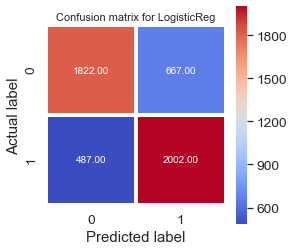

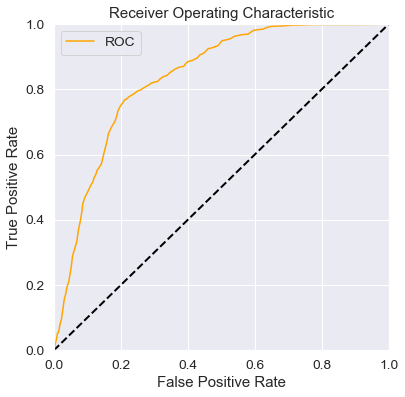

Training Score after fitting entire train set -  lr  :  0.7707

Elapsed time for fitting of model lr is 0.2927135999998427 seconds
(116293,)

Elapsed time to predict proba test dataset, model lr is 0.07020810000176425 seconds
(116293,)

Elapsed time to predict test dataset, model lr is 0.028185999999550404 seconds


In [89]:
#Fit and test the best LogisticReg Model
model_abr  = "lr"
model_name = "LogisticReg"
model      = best_lr
best_lr_preds, best_lr_score = fit_predict(model_name, model)
best_lr_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)

#### Logistic Regression Evaluation-1


Summary statistics after fitting/predicting the model :  LogisticReg

Model Test score:	 0.7625552430695058

Confusion Matrix for model :  LogisticReg 
 [[1754  735]
 [ 447 2042]]
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      2489
           1       0.74      0.82      0.78      2489

    accuracy                           0.76      4978
   macro avg       0.77      0.76      0.76      4978
weighted avg       0.77      0.76      0.76      4978


		 TrueNegatives : 1754, FalsePositives : 735,
		 FalseNegatives = 447, TruePositives = 2042
sensitivity = 0.8204098031337886
specificity = 0.7047006830052229
precision = 0.7353258912495498
accuracy = 0.7625552430695058
misclassification rate = 0.23744475693049416
       true_values  pred_probs_LogisticReg
8314             0                0.062548
4522             0                0.080276
13383            1                0.820119
10520            1                0.472544
19862      

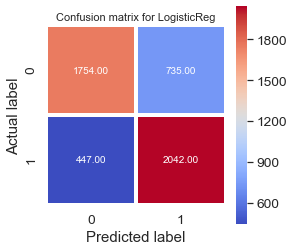

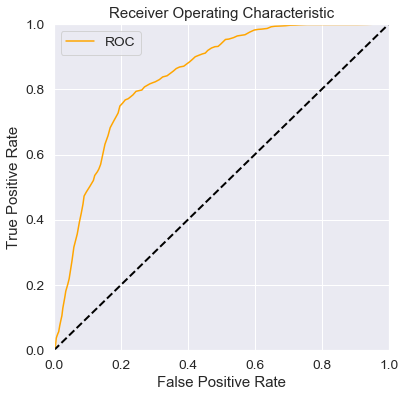

Training Score after fitting entire train set -  lr1  :  0.763

Elapsed time for fitting of model lr1 is 0.46328349999384955 seconds
(116293,)

Elapsed time to predict proba test dataset, model lr1 is 0.344733100006124 seconds
(116293,)

Elapsed time to predict test dataset, model lr1 is 0.027067700008046813 seconds


In [113]:
#Fit and test the best LogisticReg Model
model_abr  = "lr1"
model_name = "LogisticReg"
model      = best_lr1
best_lr_preds, best_lr_score = fit_predict(model_name, model)
best_lr_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)

#### Logistic Regression Evaluation-2


Summary statistics after fitting/predicting the model :  LogisticReg

Model Test score:	 0.7615508236239453

Confusion Matrix for model :  LogisticReg 
 [[1760  729]
 [ 458 2031]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      2489
           1       0.74      0.82      0.77      2489

    accuracy                           0.76      4978
   macro avg       0.76      0.76      0.76      4978
weighted avg       0.76      0.76      0.76      4978


		 TrueNegatives : 1760, FalsePositives : 729,
		 FalseNegatives = 458, TruePositives = 2031
sensitivity = 0.8159903575733226
specificity = 0.707111289674568
precision = 0.7358695652173913
accuracy = 0.7615508236239453
misclassification rate = 0.23844917637605464
       true_values  pred_probs_LogisticReg
8314             0                0.077771
4522             0                0.103856
13383            1                0.803415
10520            1                0.455406
19862       

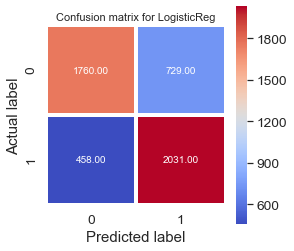

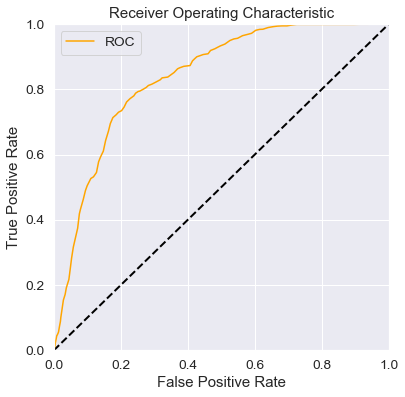

Training Score after fitting entire train set -  lr2  :  0.7616

Elapsed time for fitting of model lr2 is 0.3671985999972094 seconds
(116293,)

Elapsed time to predict proba test dataset, model lr2 is 0.04040549999626819 seconds
(116293,)

Elapsed time to predict test dataset, model lr2 is 0.03262719999474939 seconds


In [114]:
#Fit and test the best LogisticReg Model
model_abr  = "lr2"
model_name = "LogisticReg"
model      = best_lr2
best_lr_preds, best_lr_score = fit_predict(model_name, model)
best_lr_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)

#### 5.2.2 Logistic Regression Kaggle Score 
      
- From shortlisted models, the one with parameters (C=0.05,class_weight = 'balanced', penalty = 'l2', solver = 'liblinear',fit_intercept = False) gave best results on kaggle submission.
- Kaggle Score
    - Private score : 0.69947
    - Public score  : 0.71320

### 5.3 AdaBoostClassifier

#### 5.3.1 AdaBoostClassifier Models Create, Validate

- From a dozen models used for tuning, shortlisted models tuned were selected for further evaluation as shown below

In [117]:
#instantiate models to check predictions against Test Dataset
best_ada   = AdaBoostClassifier(random_state=42, n_estimators=410, learning_rate=0.85)
best_ada1  = AdaBoostClassifier(random_state=42, n_estimators=390, learning_rate=0.85)
best_ada2  = AdaBoostClassifier(random_state=42, n_estimators=300, learning_rate=0.6)
best_ada3  = AdaBoostClassifier(random_state=42, n_estimators=350, learning_rate=0.8) 
# best_ada1  = AdaBoostClassifier(random_state=42, n_estimators=410, learning_rate=0.85, algorithm="SAMME")
# best_ada2  = AdaBoostClassifier(random_state=42, n_estimators=390, learning_rate=0.85, algorithm="SAMME")
# best_ada3  = AdaBoostClassifier(random_state=42, n_estimators=300, learning_rate=0.6, algorithm="SAMME")
# best_ada4  = AdaBoostClassifier(random_state=42, n_estimators=350, learning_rate=0.8, algorithm="SAMME")


Summary statistics after fitting/predicting the model :  AdaBoost

Model Test score:	 0.9431498593812776

Confusion Matrix for model :  AdaBoost 
 [[2349  140]
 [ 143 2346]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2489
           1       0.94      0.94      0.94      2489

    accuracy                           0.94      4978
   macro avg       0.94      0.94      0.94      4978
weighted avg       0.94      0.94      0.94      4978


		 TrueNegatives : 2349, FalsePositives : 140,
		 FalseNegatives = 143, TruePositives = 2346
sensitivity = 0.9425472077139413
specificity = 0.9437525110486139
precision = 0.9436846339501207
accuracy = 0.9431498593812776
misclassification rate = 0.05685014061872238
       true_values  pred_probs_AdaBoost
8314             0             0.471835
4522             0             0.496059
13383            1             0.507691
10520            1             0.509876
19862            1             0

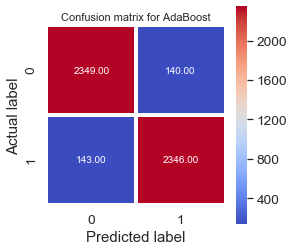

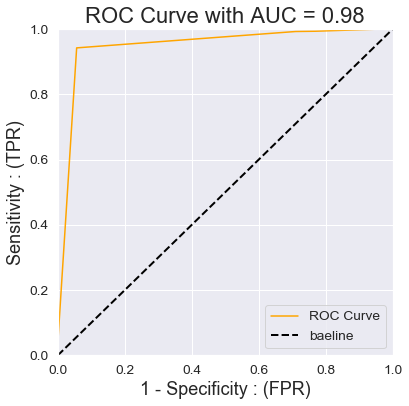

Training Score after fitting entire train set -  ada  :  0.9629

Elapsed time for fitting of model ada is 102.52078790000087 seconds
(116293,)

Elapsed time to predict proba test dataset, model ada is 24.976227499999368 seconds
(116293,)

Elapsed time to predict test dataset, model ada is 24.744432499999675 seconds


In [118]:
#Fit and test the best AdaBoost Model
model_abr  = "ada"
model_name = "AdaBoost"
model      = best_ada
best_ada_preds, best_ada_score = fit_predict(model_name, model)
best_ada_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)


Summary statistics after fitting/predicting the model :  AdaBoost

Model Test score:	 0.9419445560466051

Confusion Matrix for model :  AdaBoost 
 [[2356  133]
 [ 156 2333]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2489
           1       0.95      0.94      0.94      2489

    accuracy                           0.94      4978
   macro avg       0.94      0.94      0.94      4978
weighted avg       0.94      0.94      0.94      4978


		 TrueNegatives : 2356, FalsePositives : 133,
		 FalseNegatives = 156, TruePositives = 2333
sensitivity = 0.937324226597027
specificity = 0.9465648854961832
precision = 0.9460665044606651
accuracy = 0.9419445560466051
misclassification rate = 0.05805544395339494
       true_values  pred_probs_AdaBoost
8314             0             0.470273
4522             0             0.495696
13383            1             0.508056
10520            1             0.510223
19862            1             0.

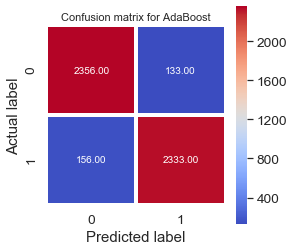

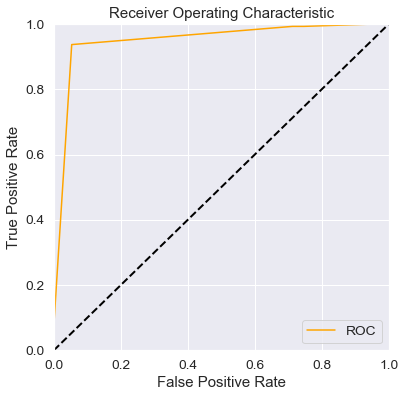

Training Score after fitting entire train set -  ada1  :  0.9622

Elapsed time for fitting of model ada1 is 93.82198609999978 seconds
(116293,)

Elapsed time to predict proba test dataset, model ada1 is 22.44321459999992 seconds
(116293,)

Elapsed time to predict test dataset, model ada1 is 22.723339099999066 seconds


In [70]:
#Fit and test the best AdaBoost Model
model_abr  = "ada1"
model_name = "AdaBoost"
model      = best_ada1
best_ada_preds, best_ada_score = fit_predict(model_name, model)
best_ada_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)


Summary statistics after fitting/predicting the model :  AdaBoost

Model Test score:	 0.9437525110486139

Confusion Matrix for model :  AdaBoost 
 [[2390   99]
 [ 181 2308]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2489
           1       0.96      0.93      0.94      2489

    accuracy                           0.94      4978
   macro avg       0.94      0.94      0.94      4978
weighted avg       0.94      0.94      0.94      4978


		 TrueNegatives : 2390, FalsePositives : 99,
		 FalseNegatives = 181, TruePositives = 2308
sensitivity = 0.9272800321414223
specificity = 0.9602249899558055
precision = 0.9588699626090569
accuracy = 0.9437525110486139
misclassification rate = 0.0562474889513861
       true_values  pred_probs_AdaBoost
8314             0             0.459506
4522             0             0.491708
13383            1             0.513320
10520            1             0.514073
19862            1             0.5

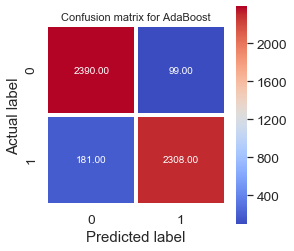

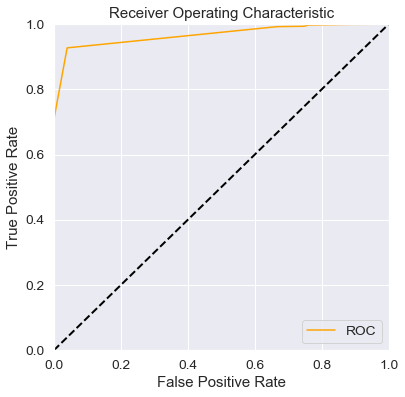

Training Score after fitting entire train set -  ada2  :  0.9542

Elapsed time for fitting of model ada2 is 74.28057719999924 seconds
(116293,)

Elapsed time to predict proba test dataset, model ada2 is 17.273858599999585 seconds
(116293,)

Elapsed time to predict test dataset, model ada2 is 17.408903999999893 seconds


In [71]:
#Fit and test the best AdaBoost Model
model_abr  = "ada2"
model_name = "AdaBoost"
model      = best_ada2
best_ada_preds, best_ada_score = fit_predict(model_name, model)
best_ada_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)


Summary statistics after fitting/predicting the model :  AdaBoost

Model Test score:	 0.943953394937726

Confusion Matrix for model :  AdaBoost 
 [[2387  102]
 [ 177 2312]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2489
           1       0.96      0.93      0.94      2489

    accuracy                           0.94      4978
   macro avg       0.94      0.94      0.94      4978
weighted avg       0.94      0.94      0.94      4978


		 TrueNegatives : 2387, FalsePositives : 102,
		 FalseNegatives = 177, TruePositives = 2312
sensitivity = 0.928887103254319
specificity = 0.959019686621133
precision = 0.9577464788732394
accuracy = 0.943953394937726
misclassification rate = 0.056046605062274005
       true_values  pred_probs_AdaBoost
8314             0             0.464194
4522             0             0.494301
13383            1             0.510167
10520            1             0.510535
19862            1             0.51

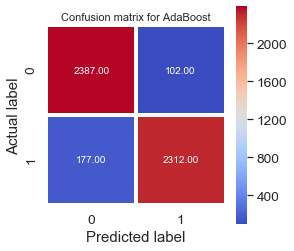

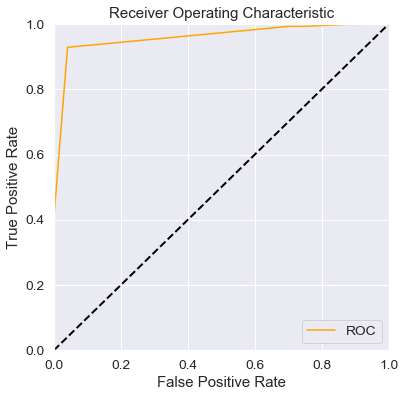

Training Score after fitting entire train set -  ada3  :  0.9611

Elapsed time for fitting of model ada3 is 84.23736019999888 seconds
(116293,)

Elapsed time to predict proba test dataset, model ada3 is 20.13263670000015 seconds
(116293,)

Elapsed time to predict test dataset, model ada3 is 19.74281780000092 seconds


In [72]:
#Fit and test the best AdaBoost Model
model_abr  = "ada3"
model_name = "AdaBoost"
model      = best_ada3
best_ada_preds, best_ada_score = fit_predict(model_name, model)
best_ada_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)

#### 5.3.2 AdaBoostClassifier Kaggle Score 
      
- From shortlisted models, the one with parameters (n_estimators=410, learning_rate=0.85) gave best results on kaggle submission.
- Kaggle Score
    - Private score : 0.67707
    - Public score  : 0.70212

    - Another submission n_estimators=350, learning_rate=0.8
        - Private score : 0.68060 
        - Public score  : 0.69712 

### 5.4 GradientBoostClassifier

#### 5.4.1 GradientBoostClassifier Models Create, Validate

- From a dozen models used for tuning, 3 shortlisted models tuned were selected for further evaluation as shown below

In [99]:
#instantiate models to check predictions against Test Dataset
best_gb    = GradientBoostingClassifier(random_state=42, n_estimators=125, learning_rate=0.1, max_depth=6)
best_gb1   = GradientBoostingClassifier(random_state=42, n_estimators=120, learning_rate=0.2, max_depth=7)
best_gb2   = GradientBoostingClassifier(random_state=42, n_estimators=120, learning_rate=0.1, max_depth=7)
#best_gb   = GradientBoostingClassifier(random_state=42, n_estimators=200, learning_rate=1.5, max_depth=20)


Summary statistics after fitting/predicting the model :  GradientBoost

Model Test score:	 0.9578143832864604

Confusion Matrix for model :  GradientBoost 
 [[2407   82]
 [ 128 2361]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2489
           1       0.97      0.95      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2407, FalsePositives : 82,
		 FalseNegatives = 128, TruePositives = 2361
sensitivity = 0.9485737243873041
specificity = 0.9670550421856167
precision = 0.9664347114203847
accuracy = 0.9578143832864604
misclassification rate = 0.04218561671353958
       true_values  pred_probs_GradientBoost
8314             0                  0.047135
4522             0                  0.006564
13383            1                  0.996260
10520            1                  0.99731

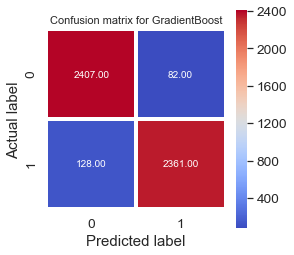

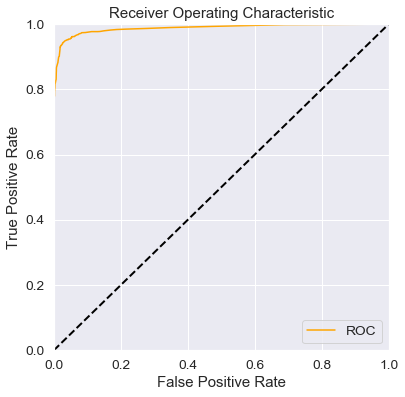

Training Score after fitting entire train set -  gb  :  0.9782

Elapsed time for fitting of model gb is 129.90407799999957 seconds
(116293,)

Elapsed time to predict proba test dataset, model gb is 0.5754828000026464 seconds
(116293,)

Elapsed time to predict test dataset, model gb is 0.6040506999997888 seconds


In [100]:
#Fit and test the best GradientBoost Model
model_abr  = "gb"
model_name = "GradientBoost"
model      = best_gb
best_gb_preds, best_gb_score = fit_predict(model_name, model)
best_gb_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)


Summary statistics after fitting/predicting the model :  GradientBoost

Model Test score:	 0.9552028927280032

Confusion Matrix for model :  GradientBoost 
 [[2424   65]
 [ 158 2331]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2489
           1       0.97      0.94      0.95      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2424, FalsePositives : 65,
		 FalseNegatives = 158, TruePositives = 2331
sensitivity = 0.9365206910405786
specificity = 0.9738850944154279
precision = 0.9728714524207012
accuracy = 0.9552028927280032
misclassification rate = 0.04479710727199679
       true_values  pred_probs_GradientBoost
8314             0                  0.002467
4522             0                  0.001892
13383            1                  0.998722
10520            1                  0.99933

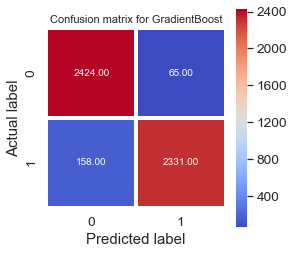

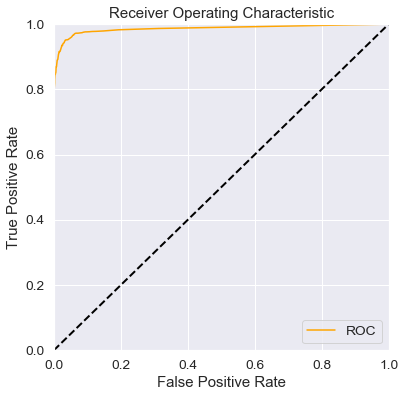

Training Score after fitting entire train set -  gb1  :  0.9802

Elapsed time for fitting of model gb1 is 141.4991637000021 seconds
(116293,)

Elapsed time to predict proba test dataset, model gb1 is 0.5827933000000485 seconds
(116293,)

Elapsed time to predict test dataset, model gb1 is 0.5914655000015046 seconds


In [101]:
#Fit and test the best GradientBoost Model
model_abr  = "gb1"
model_name = "GradientBoost"
model      = best_gb1
best_gb_preds, best_gb_score = fit_predict(model_name, model)
best_gb_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)


Summary statistics after fitting/predicting the model :  GradientBoost

Model Test score:	 0.9584170349537967

Confusion Matrix for model :  GradientBoost 
 [[2420   69]
 [ 138 2351]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2489
           1       0.97      0.94      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2420, FalsePositives : 69,
		 FalseNegatives = 138, TruePositives = 2351
sensitivity = 0.9445560466050623
specificity = 0.9722780233025311
precision = 0.9714876033057851
accuracy = 0.9584170349537967
misclassification rate = 0.0415829650462033
       true_values  pred_probs_GradientBoost
8314             0                  0.007348
4522             0                  0.004195
13383            1                  0.997404
10520            1                  0.997980

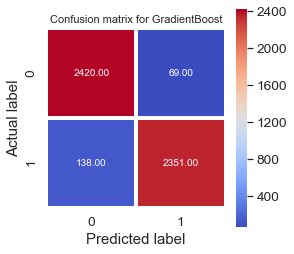

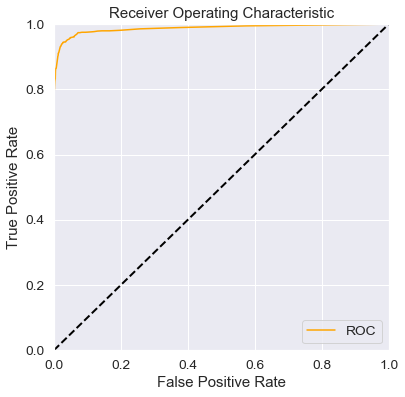

Training Score after fitting entire train set -  gb2  :  0.98

Elapsed time for fitting of model gb2 is 142.92332920000263 seconds
(116293,)

Elapsed time to predict proba test dataset, model gb2 is 0.627419499996904 seconds
(116293,)

Elapsed time to predict test dataset, model gb2 is 0.6074741000011272 seconds


In [102]:
#Fit and test the best GradientBoost Model
model_abr  = "gb2"
model_name = "GradientBoost"
model      = best_gb2
best_gb_preds, best_gb_score = fit_predict(model_name, model)
best_gb_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)

#### 5.4.2 GradientBoostClassifier Kaggle Score 
      
- From shortlisted models, the one with parameters (n_estimators=125, learning_rate=0.1, max_depth=6) gave best results on kaggle submission.
- Kaggle Score
    - Private score : 0.66794
    - Public score  : 0.70508 

### 5.5 RandomForestClassifier

#### 5.5.1 RandomForestClassifier Models Create, Validate

- From a dozen models used for tuning, 3 shortlisted models tuned were selected for further evaluation as shown below

In [73]:
#instantiate models to check predictions against Test Dataset

best_rf   = RandomForestClassifier(random_state=42, max_features=100, max_depth=15, min_samples_leaf=2, 
                              n_estimators=170, n_jobs=-1)
best_rf1   = RandomForestClassifier(random_state=42, max_features=110, max_depth=15, min_samples_leaf=4, 
                              n_estimators=180, n_jobs=-1)
best_rf2   = RandomForestClassifier(random_state=42, max_features=50, max_depth=20, min_samples_leaf=3, 
                              n_estimators=160, n_jobs=-1)
best_rf3   = RandomForestClassifier(random_state=42, max_features=30, max_depth=10, min_samples_leaf=2, 
                              n_estimators=160, n_jobs=-1)


Summary statistics after fitting/predicting the model :  RandomForest

Model Test score:	 0.9596223382884692

Confusion Matrix for model :  RandomForest 
 [[2423   66]
 [ 135 2354]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2489
           1       0.97      0.95      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2423, FalsePositives : 66,
		 FalseNegatives = 135, TruePositives = 2354
sensitivity = 0.9457613499397348
specificity = 0.9734833266372037
precision = 0.9727272727272728
accuracy = 0.9596223382884692
misclassification rate = 0.04037766171153073
       true_values  pred_probs_RandomForest
8314             0                 0.022166
4522             0                 0.011490
13383            1                 0.999998
10520            1                 0.999998
19862

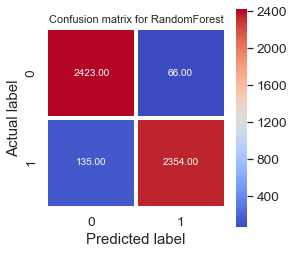

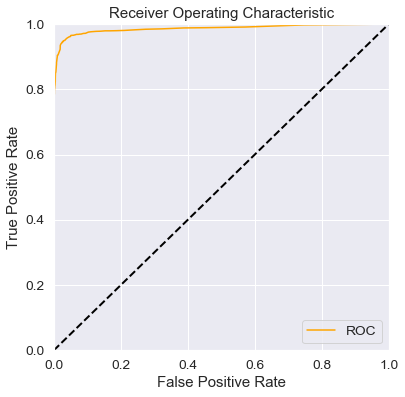

Training Score after fitting entire train set -  rf  :  0.9699

Elapsed time for fitting of model rf is 30.86963189999915 seconds
(116293,)

Elapsed time to predict proba test dataset, model rf is 0.8399468999996316 seconds
(116293,)

Elapsed time to predict test dataset, model rf is 0.8640345000003435 seconds


In [74]:
#Fit and test the best RandomForest Model
model_abr  = "rf"
model_name = "RandomForest"
model      = best_rf
best_rf_preds, best_rf_score = fit_predict(model_name, model)
best_rf_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)


Summary statistics after fitting/predicting the model :  RandomForest

Model Test score:	 0.9598232221775813

Confusion Matrix for model :  RandomForest 
 [[2429   60]
 [ 140 2349]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2489
           1       0.98      0.94      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2429, FalsePositives : 60,
		 FalseNegatives = 140, TruePositives = 2349
sensitivity = 0.9437525110486139
specificity = 0.9758939333065488
precision = 0.975093399750934
accuracy = 0.9598232221775813
misclassification rate = 0.040176777822418644
       true_values  pred_probs_RandomForest
8314             0                 0.014235
4522             0                 0.010414
13383            1                 1.000000
10520            1                 1.000000
19862

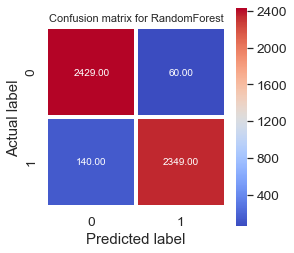

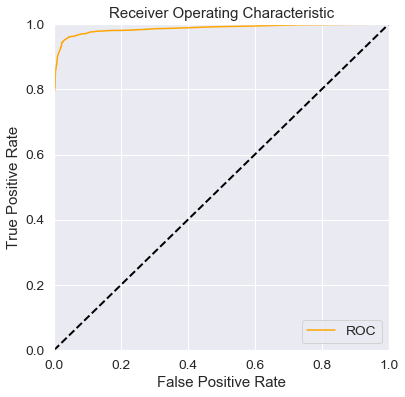

Training Score after fitting entire train set -  rf1  :  0.9682

Elapsed time for fitting of model rf1 is 32.14592559999983 seconds
(116293,)

Elapsed time to predict proba test dataset, model rf1 is 0.9171234000004915 seconds
(116293,)

Elapsed time to predict test dataset, model rf1 is 0.8760266999997839 seconds


In [75]:
#Fit and test the best RandomForest Model
model_abr  = "rf1"
model_name = "RandomForest"
model      = best_rf1
best_rf_preds, best_rf_score = fit_predict(model_name, model)
best_rf_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)


Summary statistics after fitting/predicting the model :  RandomForest

Model Test score:	 0.9608276416231418

Confusion Matrix for model :  RandomForest 
 [[2428   61]
 [ 134 2355]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2489
           1       0.97      0.95      0.96      2489

    accuracy                           0.96      4978
   macro avg       0.96      0.96      0.96      4978
weighted avg       0.96      0.96      0.96      4978


		 TrueNegatives : 2428, FalsePositives : 61,
		 FalseNegatives = 134, TruePositives = 2355
sensitivity = 0.946163117717959
specificity = 0.9754921655283246
precision = 0.9747516556291391
accuracy = 0.9608276416231418
misclassification rate = 0.039172358376858174
       true_values  pred_probs_RandomForest
8314             0                 0.010283
4522             0                 0.011794
13383            1                 1.000000
10520            1                 1.000000
19862

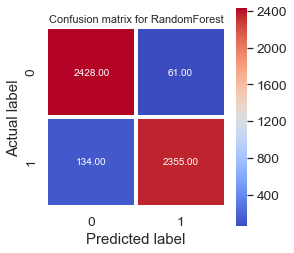

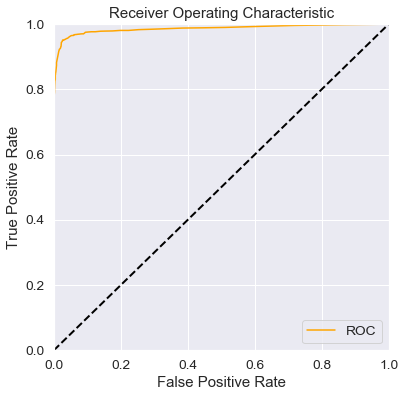

Training Score after fitting entire train set -  rf2  :  0.9694

Elapsed time for fitting of model rf2 is 14.67118660000051 seconds
(116293,)

Elapsed time to predict proba test dataset, model rf2 is 0.8295852999999624 seconds
(116293,)

Elapsed time to predict test dataset, model rf2 is 0.8614557000000787 seconds


In [76]:
#Fit and test the best RandomForest Model
model_abr  = "rf2"
model_name = "RandomForest"
model      = best_rf2
best_rf_preds, best_rf_score = fit_predict(model_name, model)
best_rf_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)

#### 5.5.2 RandomForest Kaggle Score 
      
- From shortlisted models, the one with parameters (max_features=100, max_depth=15, min_samples_leaf=2, n_estimators=170) gave best results on kaggle submission.
- Kaggle Score
    - Private score : 0.61472
    - Public score  : 0.65363
    
    - Another submission max_features=50, max_depth=20, min_samples_leaf=3, n_estimators=160
        - Private score : 0.60320 
        - Public score  : 0.65079 

### 5.6 DecisionTreeClassifier

#### 5.6.1 DecisionTreeClassifier Models Create, Validate

- From a few models used for tuning, shortlisted models tuned were selected for further evaluation as shown below

In [77]:
#instantiate models to check predictions against Test Dataset
best_dt    = DecisionTreeClassifier(random_state=42, max_depth=55, min_samples_leaf=10, min_samples_split=13)  
best_dt1   = DecisionTreeClassifier(random_state=42, max_depth=50, min_samples_leaf=6,  min_samples_split=11)
best_dt2   = DecisionTreeClassifier(random_state=42, max_depth=35, min_samples_leaf=6,  min_samples_split=4)
best_dt3   = DecisionTreeClassifier(random_state=42, max_depth=30, min_samples_leaf=5,  min_samples_split=3)


Summary statistics after fitting/predicting the model :  DecisionTree

Model Test score:	 0.926677380474086

Confusion Matrix for model :  DecisionTree 
 [[2376  113]
 [ 252 2237]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2489
           1       0.95      0.90      0.92      2489

    accuracy                           0.93      4978
   macro avg       0.93      0.93      0.93      4978
weighted avg       0.93      0.93      0.93      4978


		 TrueNegatives : 2376, FalsePositives : 113,
		 FalseNegatives = 252, TruePositives = 2237
sensitivity = 0.898754519887505
specificity = 0.954600241060667
precision = 0.9519148936170213
accuracy = 0.926677380474086
misclassification rate = 0.07332261952591403
       true_values  pred_probs_DecisionTree
8314             0                      0.0
4522             0                      0.0
13383            1                      1.0
10520            1                      1.0
19862   

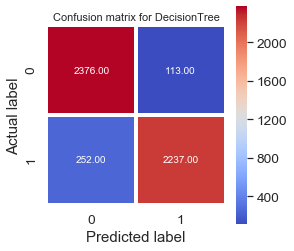

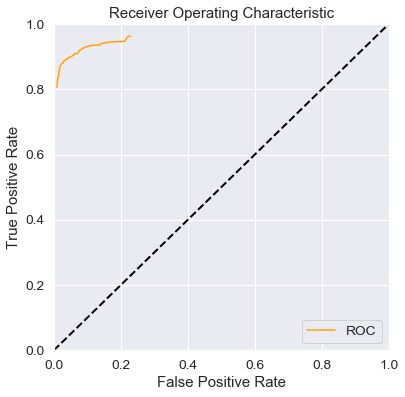

Training Score after fitting entire train set -  dt  :  0.9639

Elapsed time for fitting of model dt is 2.3314620000001014 seconds
(116293,)

Elapsed time to predict proba test dataset, model dt is 0.05880609999985609 seconds
(116293,)

Elapsed time to predict test dataset, model dt is 0.05357159999948635 seconds


In [78]:
#Fit and test the best DecisionTree Model
model_abr  = "dt"
model_name = "DecisionTree"
model      = best_dt
best_dt_preds, best_dt_score = fit_predict(model_name, model)
best_dt_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)


Summary statistics after fitting/predicting the model :  DecisionTree

Model Test score:	 0.9228605865809562

Confusion Matrix for model :  DecisionTree 
 [[2375  114]
 [ 270 2219]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2489
           1       0.95      0.89      0.92      2489

    accuracy                           0.92      4978
   macro avg       0.92      0.92      0.92      4978
weighted avg       0.92      0.92      0.92      4978


		 TrueNegatives : 2375, FalsePositives : 114,
		 FalseNegatives = 270, TruePositives = 2219
sensitivity = 0.8915226998794696
specificity = 0.9541984732824428
precision = 0.9511358765537934
accuracy = 0.9228605865809562
misclassification rate = 0.07713941341904379
       true_values  pred_probs_DecisionTree
8314             0                      0.0
4522             0                      0.0
13383            1                      1.0
10520            1                      1.0
1986

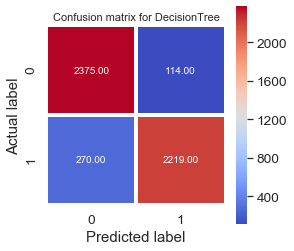

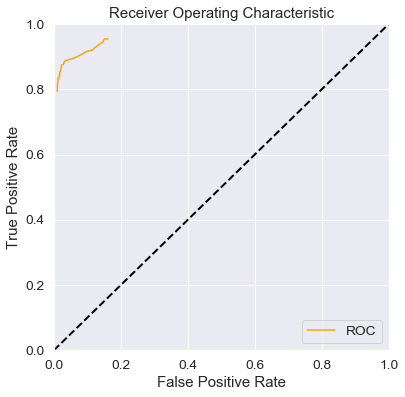

Training Score after fitting entire train set -  dt1  :  0.9676

Elapsed time for fitting of model dt1 is 2.43134210000062 seconds
(116293,)

Elapsed time to predict proba test dataset, model dt1 is 0.06958049999957439 seconds
(116293,)

Elapsed time to predict test dataset, model dt1 is 0.06799750000027416 seconds


In [79]:
#Fit and test the best DecisionTree Model
model_abr  = "dt1"
model_name = "DecisionTree"
model      = best_dt1
best_dt_preds, best_dt_score = fit_predict(model_name, model)
best_dt_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)


Summary statistics after fitting/predicting the model :  DecisionTree

Model Test score:	 0.9228605865809562

Confusion Matrix for model :  DecisionTree 
 [[2375  114]
 [ 270 2219]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2489
           1       0.95      0.89      0.92      2489

    accuracy                           0.92      4978
   macro avg       0.92      0.92      0.92      4978
weighted avg       0.92      0.92      0.92      4978


		 TrueNegatives : 2375, FalsePositives : 114,
		 FalseNegatives = 270, TruePositives = 2219
sensitivity = 0.8915226998794696
specificity = 0.9541984732824428
precision = 0.9511358765537934
accuracy = 0.9228605865809562
misclassification rate = 0.07713941341904379
       true_values  pred_probs_DecisionTree
8314             0                      0.0
4522             0                      0.0
13383            1                      1.0
10520            1                      1.0
1986

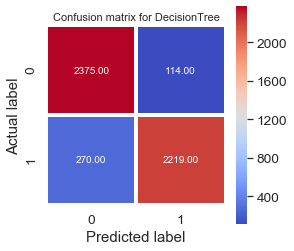

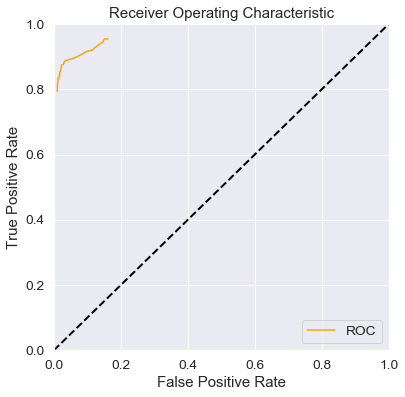

Training Score after fitting entire train set -  dt2  :  0.9676

Elapsed time for fitting of model dt2 is 2.3235970999994606 seconds
(116293,)

Elapsed time to predict proba test dataset, model dt2 is 0.056556600000476465 seconds
(116293,)

Elapsed time to predict test dataset, model dt2 is 0.05560919999879843 seconds


In [80]:
#Fit and test the best DecisionTree Model
model_abr  = "dt2"
model_name = "DecisionTree"
model      = best_dt2
best_dt_preds, best_dt_score = fit_predict(model_name, model)
best_dt_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)


Summary statistics after fitting/predicting the model :  DecisionTree

Model Test score:	 0.9264764965849739

Confusion Matrix for model :  DecisionTree 
 [[2383  106]
 [ 260 2229]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2489
           1       0.95      0.90      0.92      2489

    accuracy                           0.93      4978
   macro avg       0.93      0.93      0.93      4978
weighted avg       0.93      0.93      0.93      4978


		 TrueNegatives : 2383, FalsePositives : 106,
		 FalseNegatives = 260, TruePositives = 2229
sensitivity = 0.8955403776617116
specificity = 0.9574126155082362
precision = 0.9546038543897216
accuracy = 0.9264764965849739
misclassification rate = 0.07352350341502611
       true_values  pred_probs_DecisionTree
8314             0                      0.0
4522             0                      0.0
13383            1                      1.0
10520            1                      1.0
1986

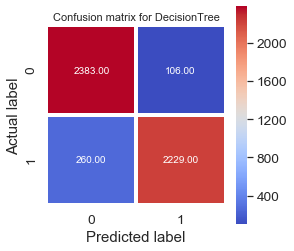

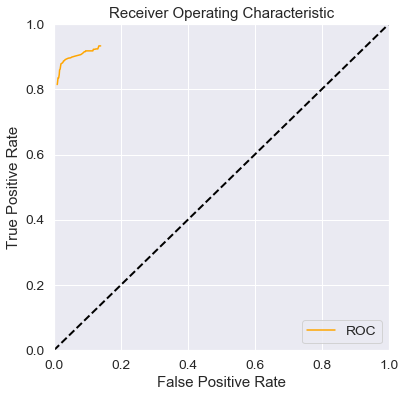

Training Score after fitting entire train set -  dt3  :  0.9694

Elapsed time for fitting of model dt3 is 2.482787400000234 seconds
(116293,)

Elapsed time to predict proba test dataset, model dt3 is 0.05877469999904861 seconds
(116293,)

Elapsed time to predict test dataset, model dt3 is 0.05419819999951869 seconds


In [81]:
#Fit and test the best DecisionTree Model
model_abr  = "dt3"
model_name = "DecisionTree"
model      = best_dt3
best_dt_preds, best_dt_score = fit_predict(model_name, model)
best_dt_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)

#### 5.6.2 DecisionTree Kaggle Score 
      
- From shortlisted models, the one with parameters (max_depth=55, min_samples_leaf=10, min_samples_split=13) gave best results on kaggle submission.



- Kaggle Score
    - Private score : 0.54087
    - Public score  : 0.58455
    
     - Another submission (max_depth=35, min_samples_leaf=6, min_samples_split=4)
        - Private score : 0.50657
        - Public score  : 0.51160
    - Another submission (max_depth=25, min_samples_leaf=1, min_samples_split=3)
        - Private score : 0.48256
        - Public score  : 0.47029

### 5.7 SupportVectorMachineClassifier

#### 5.7.1 SVM Models Create, Validate

- From a few models used for tuning, shortlisted models tuned were selected for further evaluation as shown below

In [83]:
best_svm  = SVC(gamma='scale', probability=True, C = 40, kernel = 'rbf')
best_svm1 = SVC(gamma='scale', probability=True, C = 50, kernel = 'rbf')
best_svm2 = SVC(gamma='scale', probability=True, C = 60, kernel = 'rbf')
best_svm3 = SVC(gamma='scale', probability=True, C = 70, kernel = 'rbf')


Summary statistics after fitting/predicting the model :  SupportVecMac

Model Test score:	 0.948372840498192

Confusion Matrix for model :  SupportVecMac 
 [[2346  143]
 [ 114 2375]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2489
           1       0.94      0.95      0.95      2489

    accuracy                           0.95      4978
   macro avg       0.95      0.95      0.95      4978
weighted avg       0.95      0.95      0.95      4978


		 TrueNegatives : 2346, FalsePositives : 143,
		 FalseNegatives = 114, TruePositives = 2375
sensitivity = 0.9541984732824428
specificity = 0.9425472077139413
precision = 0.943208895949166
accuracy = 0.948372840498192
misclassification rate = 0.051627159501807955
       true_values  pred_probs_SupportVecMac
8314             0                  0.021937
4522             0                  0.044987
13383            1                  0.996907
10520            1                  0.999989

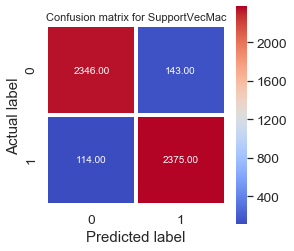

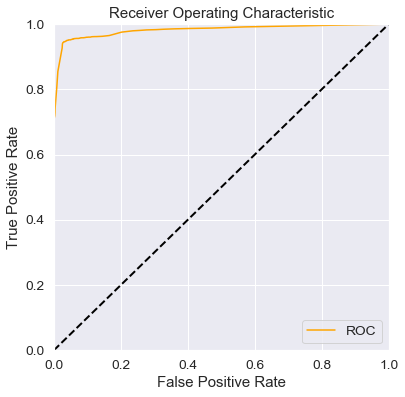

Training Score after fitting entire train set -  svc  :  0.9759

Elapsed time for fitting of model svc is 71.30295070000284 seconds
(116293,)

Elapsed time to predict proba test dataset, model svc is 40.64195830000244 seconds
(116293,)

Elapsed time to predict test dataset, model svc is 39.73568199999863 seconds


In [84]:
#Fit and test the best SVM Model
model_abr  = "svc"
model_name = "SupportVecMac"
model      = best_svm
best_dt_preds, best_dt_score = fit_predict(model_name, model)
best_dt_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)


Summary statistics after fitting/predicting the model :  SupportVecMac

Model Test score:	 0.9473684210526315

Confusion Matrix for model :  SupportVecMac 
 [[2340  149]
 [ 113 2376]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2489
           1       0.94      0.95      0.95      2489

    accuracy                           0.95      4978
   macro avg       0.95      0.95      0.95      4978
weighted avg       0.95      0.95      0.95      4978


		 TrueNegatives : 2340, FalsePositives : 149,
		 FalseNegatives = 113, TruePositives = 2376
sensitivity = 0.954600241060667
specificity = 0.9401366010445962
precision = 0.9409900990099009
accuracy = 0.9473684210526315
misclassification rate = 0.05263157894736842
       true_values  pred_probs_SupportVecMac
8314             0                  0.019250
4522             0                  0.042877
13383            1                  0.997172
10520            1                  0.99999

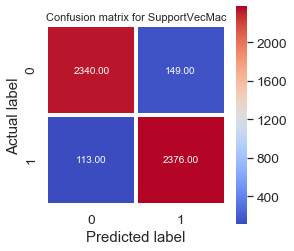

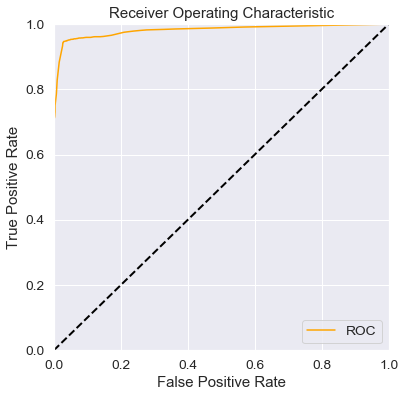

Training Score after fitting entire train set -  svc1  :  0.9769

Elapsed time for fitting of model svc1 is 71.1580774000031 seconds
(116293,)

Elapsed time to predict proba test dataset, model svc1 is 40.33724130000337 seconds
(116293,)

Elapsed time to predict test dataset, model svc1 is 41.080892300000414 seconds


In [131]:
#Fit and test the best SVM Model
model_abr  = "svc1"
model_name = "SupportVecMac"
model      = best_svm1
best_dt_preds, best_dt_score = fit_predict(model_name, model)
best_dt_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)


Summary statistics after fitting/predicting the model :  SupportVecMac

Model Test score:	 0.9465648854961832

Confusion Matrix for model :  SupportVecMac 
 [[2335  154]
 [ 112 2377]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2489
           1       0.94      0.96      0.95      2489

    accuracy                           0.95      4978
   macro avg       0.95      0.95      0.95      4978
weighted avg       0.95      0.95      0.95      4978


		 TrueNegatives : 2335, FalsePositives : 154,
		 FalseNegatives = 112, TruePositives = 2377
sensitivity = 0.9550020088388911
specificity = 0.9381277621534753
precision = 0.9391544843935203
accuracy = 0.9465648854961832
misclassification rate = 0.05343511450381679
       true_values  pred_probs_SupportVecMac
8314             0                  0.019022
4522             0                  0.043150
13383            1                  0.997185
10520            1                  0.9999

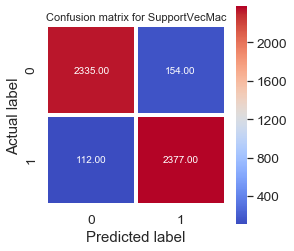

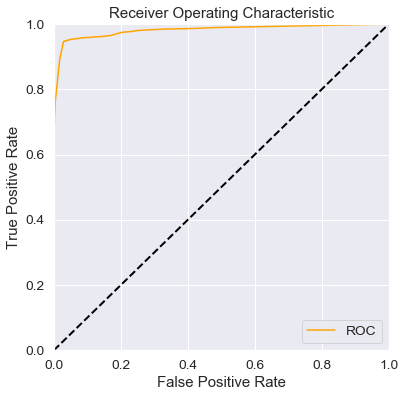

Training Score after fitting entire train set -  svc2  :  0.9775

Elapsed time for fitting of model svc2 is 66.28535509998619 seconds
(116293,)

Elapsed time to predict proba test dataset, model svc2 is 38.824901400003 seconds
(116293,)

Elapsed time to predict test dataset, model svc2 is 39.90560340000957 seconds


In [134]:
#Fit and test the best SVM Model
model_abr  = "svc2"
model_name = "SupportVecMac"
model      = best_svm2
best_dt_preds, best_dt_score = fit_predict(model_name, model)
best_dt_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)


Summary statistics after fitting/predicting the model :  SupportVecMac

Model Test score:	 0.9469666532744074

Confusion Matrix for model :  SupportVecMac 
 [[2337  152]
 [ 112 2377]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2489
           1       0.94      0.96      0.95      2489

    accuracy                           0.95      4978
   macro avg       0.95      0.95      0.95      4978
weighted avg       0.95      0.95      0.95      4978


		 TrueNegatives : 2337, FalsePositives : 152,
		 FalseNegatives = 112, TruePositives = 2377
sensitivity = 0.9550020088388911
specificity = 0.9389312977099237
precision = 0.9398971925662317
accuracy = 0.9469666532744074
misclassification rate = 0.05303334672559261
       true_values  pred_probs_SupportVecMac
8314             0                  0.017001
4522             0                  0.042213
13383            1                  0.997153
10520            1                  0.9999

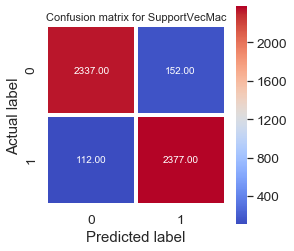

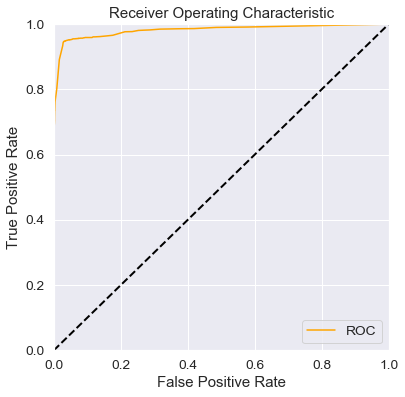

Training Score after fitting entire train set -  svc3  :  0.9781

Elapsed time for fitting of model svc3 is 69.90478969999822 seconds
(116293,)

Elapsed time to predict proba test dataset, model svc3 is 41.611828799999785 seconds
(116293,)

Elapsed time to predict test dataset, model svc3 is 39.920049799999106 seconds


In [135]:
#Fit and test the best SVM Model
model_abr  = "svc3"
model_name = "SupportVecMac"
model      = best_svm3
best_dt_preds, best_dt_score = fit_predict(model_name, model)
best_dt_score_test_unseen = fit_prepare_kaggle_file(model_abr, model_name, model)

#### 5.7.2 SVC Kaggle Score 
      
- From shortlisted models, the one with parameters (gamma='scale', probability=True, C = 40, kernel = 'rbf') gave best results on kaggle submission.
- Kaggle Score
    - Private score : 0.60381
    - Public score  : 0.64242
    
    - Another submission gamma='scale', probability=True, C = 70, kernel = 'rbf'
        - Private score : 0.60197
        - Public score  : 0.63588

## 6. Recommended Model

Given that the train dataset had an imbalanced data (siginificantly lower number and propotionate percentage of cases where West Nile Virus was present), accuracy was not given much importance during evaluation.

 - More emphasis was given to improve F1 score in order to achieve a balance between 
      - low false negatives (to prevent missing out on spraying where the virus was actually present)
      - low false positives (to lower cost of spraying). 
 - All Models were hyper tuned and some were dropped due to poor results on Kaggle (BernoulliNB, GaussianNB and KNN) and effort was focused more on improving F1 score by iterating again on data/feature engineering aspects.

- Model for Short term (immediate implementation)
     - Though the F1-score of AdaBoost, Gradient Boost, Extra Tree is very high compared to Logistics Regression, We recommend Logistics regression be used to for first year due to following reasons
        - Logistics regression is computationally least expensive
        - Easiest to explain to get stakeholders buy-in
        - Reaction time for stakeholders is short and quick adaptation of model is key along with explainability
        - As Data gathering takes organized steps to include more data from diverse data sources, model trials duration will have tremedous time pressure on data science team which should be spending more time with users than waiting for hours to get results from models like SVM and pose challenges to explain rationalse for recommendation.
        - Data science team's key tasks in first year will be to build credibility by spending more time engaging stakeholder, time saved from building computationally expensive models can be utilized to improve data collection process.
        - It has much kaggle score (25% better) than other simplified models like DecisionTree
- Model for Long term (Implementation from second cycle)
    - For subsequent work, we would recommend to spend more time on adapting the GradientBoost as it has highest scores on all metrics though it is computationally very demanding but its several times better based on observations analysed as compared to another computationally expensive SVM). 
- AdaBoost is good candidate in medium term if department of health, city of Chicago decided to take 3 steps approach (Short term, medium term and long term) for gradual adoption approach based on design of experiments. AdaBoost is recommended based on very good F1 score, very low misclassification rate, good kaggle score and being computationally lightweight will enable transition to GradientBoost classifier. 
    

Logistic Regression Model ROC Curve and Confusion Matrix


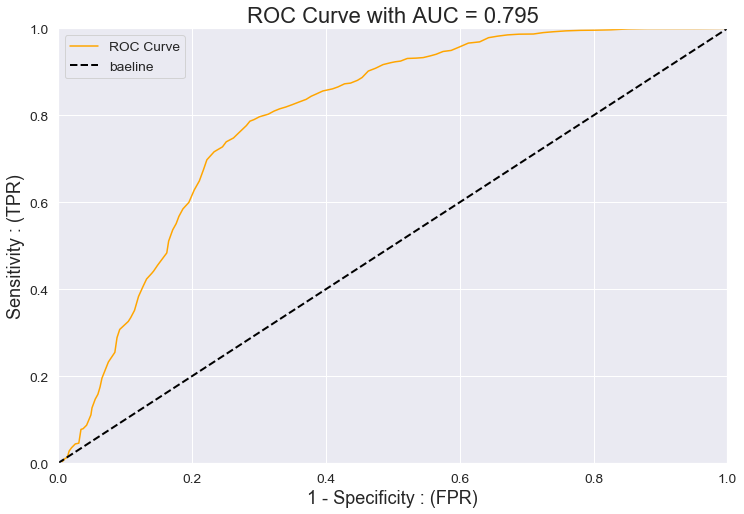


Confusion Matrix for model :  LogReg 
 [[1760  729]
 [ 522 1967]]


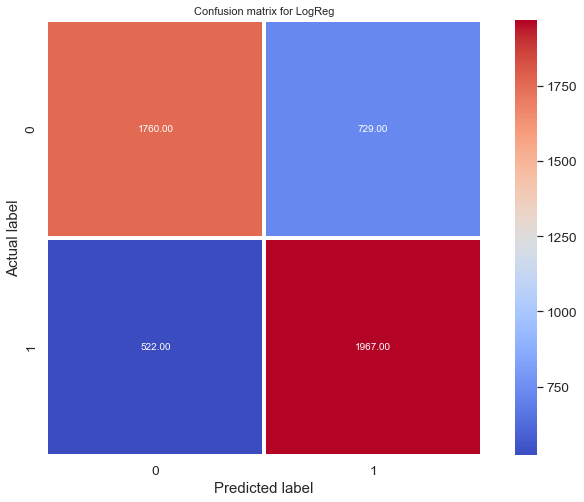

In [115]:
print("Logistic Regression Model ROC Curve and Confusion Matrix")
aucroc(best_lr.predict_proba(X_test), y_test, False)
plot_confusion_matrix("LogReg",confusion_matrix(y_test,best_lr.predict(X_test)),y_test,best_lr.predict(X_test), False)

AdaBoostClassifier Model ROC Curve and Confusion Matrix


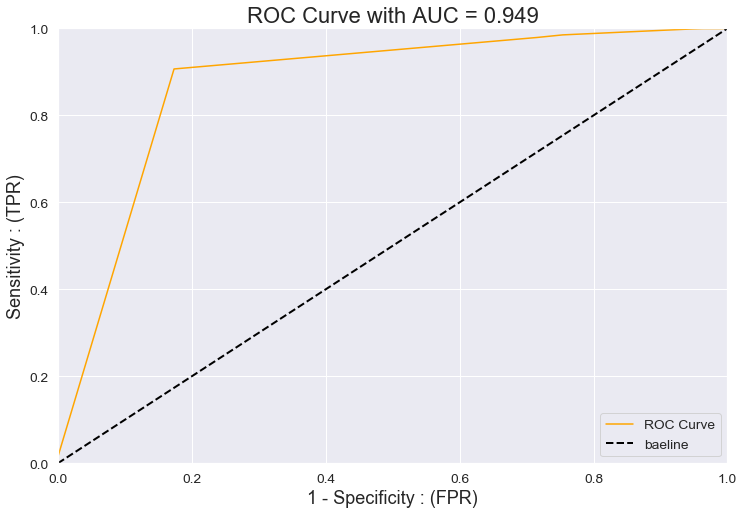


Confusion Matrix for model :  Ada 
 [[2057  432]
 [ 232 2257]]


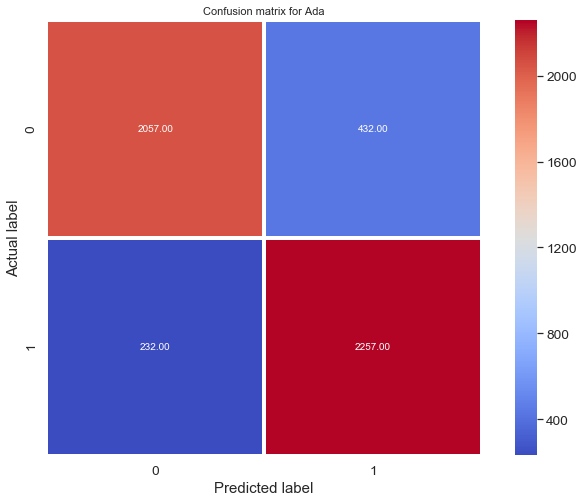

In [119]:
print("AdaBoostClassifier Model ROC Curve and Confusion Matrix")
aucroc(best_ada.predict_proba(X_test), y_test, False)
plot_confusion_matrix("Ada",confusion_matrix(y_test,best_ada.predict(X_test)),y_test,best_ada.predict(X_test),False)

In [ ]:
print("GradientBoostClassifier Model ROC Curve and Confusion Matrix")
aucroc(best_gb.predict_proba(X_test), y_test, False)
plot_confusion_matrix("GB", confusion_matrix(y_test, best_gb.predict(X_test)), y_test, best_gb.predict(X_test), False)

With ROC AUC at 0.954, the long term recommended model is doing quite well, although improvements can be made for better classifications.